# Description

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

from clustering.methods import ClusterInterpreter
from data.recount2 import LVAnalysis
from data.cache import read_data
import conf

# Settings

In [3]:
# PARTITION_K = None
# PARTITION_CLUSTER_ID = None

In [4]:
# # Parameters
# PARTITION_K = 22
# PARTITION_CLUSTER_ID = 19

# Load MultiPLIER summary

In [5]:
multiplier_model_summary = read_data(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [6]:
multiplier_model_summary.shape

(2157, 5)

In [7]:
multiplier_model_summary.head()

pathway LV index       AUC   p-value  \
1                  KEGG_LYSINE_DEGRADATION        1  0.388059  0.866078   
2                   REACTOME_MRNA_SPLICING        1  0.733057  0.000048   
3  MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX        1  0.680555  0.001628   
4                     KEGG_DNA_REPLICATION        1  0.549473  0.312155   
5                     PID_MYC_ACTIVPATHWAY        1  0.639303  0.021702   

        FDR  
1  0.956005  
2  0.000582  
3  0.011366  
4  0.539951  
5  0.083739

# Load data

## Original data

In [8]:
INPUT_SUBSET = "z_score_std"

In [9]:
INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [10]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/z_score_std/z_score_std-projection-smultixcan-efo_partial-mashr-zscores.pkl')

'z_score_std-projection-smultixcan-efo_partial-mashr-zscores'

In [11]:
data = pd.read_pickle(input_filepath)

In [12]:
data.shape

(3752, 987)

In [13]:
data.head()

LV1       LV2       LV3       LV4       LV5  \
100001_raw-Food_weight  -0.695006  1.962565  0.057683  0.878731 -0.539977   
100002_raw-Energy       -1.528127 -0.345309 -0.148953 -0.242060  0.373427   
100003_raw-Protein      -0.704572 -1.011299  0.671420  0.143991  0.615212   
100004_raw-Fat          -0.989832 -1.875490  0.261555 -1.420719  0.366238   
100005_raw-Carbohydrate -0.580143  0.243335  0.158966 -0.036558  0.068176   

                              LV6       LV7       LV8       LV9      LV10  \
100001_raw-Food_weight   1.481272 -0.396422  1.090180  0.759223  0.931395   
100002_raw-Energy        0.791092  0.263477  0.987702  0.354391  1.416059   
100003_raw-Protein       0.874212 -0.040998  0.915170  0.254369 -0.084237   
100004_raw-Fat           1.167049  0.257387  0.717674 -0.997664  0.969825   
100005_raw-Carbohydrate -0.202639  1.101281  0.675227  1.463432  1.010078   

                         ...     LV978     LV979     LV980     LV981  \
100001_raw-Food_weight   ...  1.129784  1.752343 -1.411403  2.823863   
100002_raw-Energy        ...  0.224604  0.769882 -0.509482  0.091153   
100003_raw-Protein       ...  1.003019  1.044314 -2.376108  0.004778   
100004_raw-Fat           ...  0.585913  0.638314  0.119139 -0.140204   
100005_raw-Carbohydrate  ... -0.249108 -0.026814  0.232713  0.323682   

                            LV982     LV983     LV984     LV985     LV986  \
100001_raw-Food_weight   0.931116 -1.054519  0.432982 -0.633597  0.554279   
100002_raw-Energy        2.286789 -1.008256 -0.029764  1.737229 -0.272107   
100003_raw-Protein       0.053714 -0.892447 -0.183800  1.377991 -0.278794   
100004_raw-Fat           1.394326 -1.173402  0.555058  1.013982 -0.544506   
100005_raw-Carbohydrate  1.168642 -0.282935  0.653105  1.909526  0.199997   

                            LV987  
100001_raw-Food_weight  -0.642479  
100002_raw-Energy       -0.526125  
100003_raw-Protein      -0.419733  
100004_raw-Fat          -0.064061  
100005_raw-Carbohydrate -1.656894  

[5 rows x 987 columns]

## Clustering partitions

In [14]:
# CONSENSUS_CLUSTERING_DIR = Path(
#     conf.RESULTS["CLUSTERING_DIR"], "consensus_clustering"
# ).resolve()

# display(CONSENSUS_CLUSTERING_DIR)

In [15]:
# input_file = Path(CONSENSUS_CLUSTERING_DIR, "best_partitions_by_k.pkl").resolve()
# display(input_file)

In [16]:
# best_partitions = pd.read_pickle(input_file)

In [17]:
# best_partitions.shape

In [18]:
# best_partitions.head()

# Functions

In [19]:
# def show_cluster_stats(data, partition, cluster):
#     cluster_traits = data[partition == cluster].index
#     display(f"Cluster '{cluster}' has {len(cluster_traits)} traits")
#     display(cluster_traits)

# LV analysis
<a id="lv_analysis"></a>

## Associated traits

In [20]:
# display(best_partitions.loc[PARTITION_K])
# part = best_partitions.loc[PARTITION_K, "partition"]

In [21]:
# show_cluster_stats(data, part, PARTITION_CLUSTER_ID)

## Top attributes

Here we go through the list of associated latent variables and, for each, we show associated pathways (prior knowledge), top traits, top genes and the top tissues/cell types where those genes are expressed.

In [22]:
# lv_obj = LVAnalysis("LV678", data)

In [23]:
# lv_data = lv_obj.get_experiments_data()

In [24]:
# _tmp = lv_data[["tissue", "LV678"]].dropna()

In [25]:
# _tmp[_tmp["tissue"].str.contains("Muscle")]

In [26]:
selected_lvs = [
    "LV678",
    "LV64",
    "LV897",
    "LV575",
    "LV736",
    "LV157",
    "LV421",
    "LV469",
    "LV250",
    "LV420",
    "LV558",
    "LV630",
    "LV750",
    "LV99",
    "LV676",
    "LV775",
    "LV131",
    "LV199",
    "LV896",
    "LV783",
    "LV467",
    "LV498",
    "LV515",
    "LV343",
]

In [27]:
LV_OBJS = {}

pathway LV index       AUC  \
1629              REACTOME_MITOCHONDRIAL_PROTEIN_IMPORT      678  0.742277   
1631                     KEGG_OXIDATIVE_PHOSPHORYLATION      678  0.982290   
1633  REACTOME_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TR...      678  0.856376   
1635  REACTOME_RESPIRATORY_ELECTRON_TRANSPORT_ATP_SY...      678  0.988348   
1636            REACTOME_RESPIRATORY_ELECTRON_TRANSPORT      678  0.998043   
1637  REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN...      678  0.686728   
1638                    MIPS_55S_RIBOSOME_MITOCHONDRIAL      678  0.806485   

           p-value           FDR  
1629  3.476169e-03  1.994175e-02  
1631  5.458481e-16  5.747488e-14  
1633  2.596467e-10  9.656171e-09  
1635  1.054241e-12  5.939594e-11  
1636  7.331802e-11  3.100921e-09  
1637  7.384320e-04  6.033325e-03  
1638  5.168314e-06  8.197098e-05

SRP011924, SRP066729, SRP055569, SRP052978, SRP029889, SRP026315, SRP042161, SRP017933, SRP009266, SRP033135, SRP009862, SRP014428, SRP006475, SRP055810, SRP062177, SRP034712, SRP028301, SRP044206, SRP012056, SRP057196, SRP057118, SRP045573, SRP024268, SRP018838, SRP060416, SRP018719, SRP061888, SRP058840, SRP002915, SRP059775, SRP014867, SRP033276, SRP029899, SRP021478, SRP049500, SRP036821, SRP055513, SRP058773, SRP045666, SRP041706, SRP011185, SRP006575, SRP028336, SRP043368, SRP012461, SRP058740, SRP007947, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (45 != 47)
  warnings.warn(


''

20463-Ever_heard_an_unreal_voice                                                                                                                                         3.710002
100920_2103-Type_milk_consumed_skimmed                                                                                                                                   3.058085
22617_5434-Job_SOC_coding_Chefs_cooks                                                                                                                                    2.959990
K11_CHRONPANC-Chronic_pancreatitis                                                                                                                                       2.945108
22601_34333162-Job_coding_public_relations_officer_press_officer_information_officer                                                                                     2.938326
20003_1140868080-Treatmentmedication_code_cyclizine                                                           

''

gene_name     LV678 gene_band
0     UQCRQ  3.754246    5q31.1
1    NDUFB1  3.672410  14q32.12
2     COX8A  3.472975   11q13.1
3    UQCR11  3.360704   19p13.3
4    NDUFA4  3.333345    7p21.3
5    COX6A1  3.314685  12q24.31
6   NDUFA13  3.255578  19p13.11
7    NDUFB2  3.182677      7q34
8    COX6B1  3.124476  19q13.12
9     ATP5O  3.093498  21q22.11

tissue            0.023846
cell type         0.009898
tissue subtype    0.007427
dtype: float64

array(['SRP011924', 'SRP066729', 'SRP052978', 'SRP029889', 'SRP017933',
       'SRP014428', 'SRP057196', 'SRP057118', 'SRP045573', 'SRP024268',
       'SRP061888', 'SRP033276', 'SRP029899', 'SRP021478', 'SRP036821',
       'SRP055513', 'SRP045666', 'SRP041706', 'SRP006575', 'SRP028336',
       'SRP043368', 'SRP058740'], dtype=object)

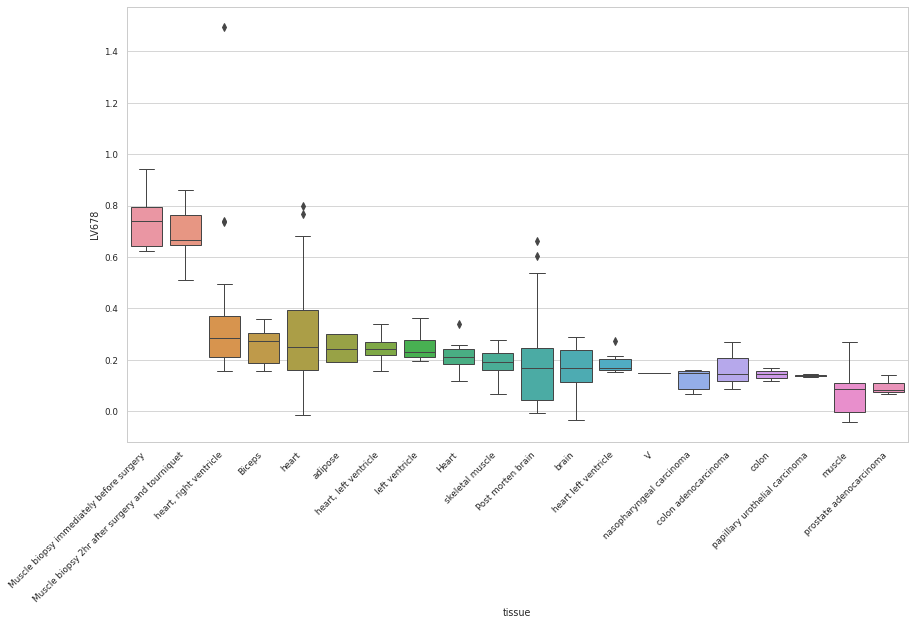

array(['SRP055569', 'SRP026315', 'SRP042161', 'SRP033135', 'SRP014428',
       'SRP062177', 'SRP044206', 'SRP057196', 'SRP060416', 'SRP049500',
       'SRP006575', 'SRP012461', 'SRP007947'], dtype=object)

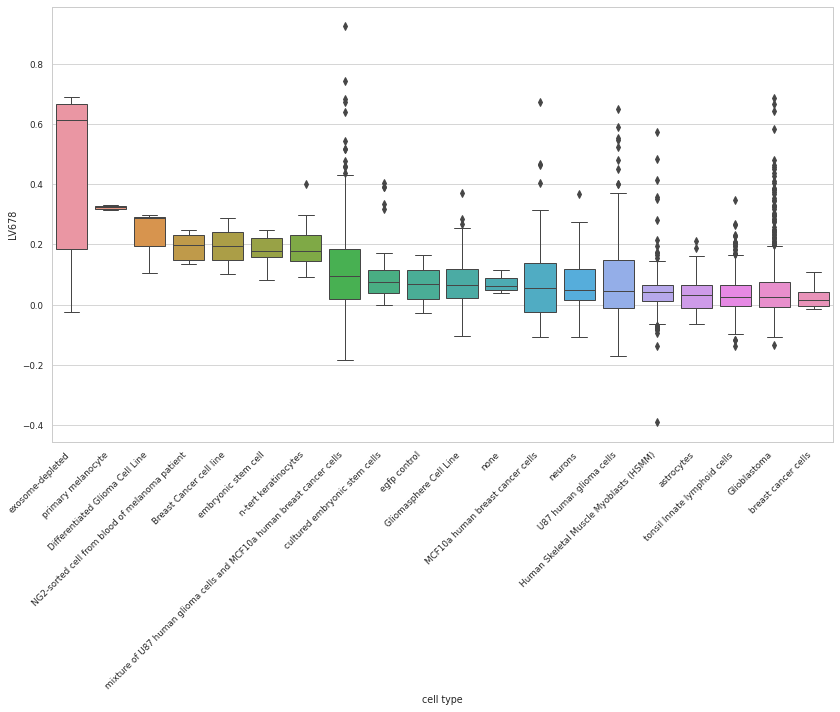

array(['SRP036821'], dtype=object)

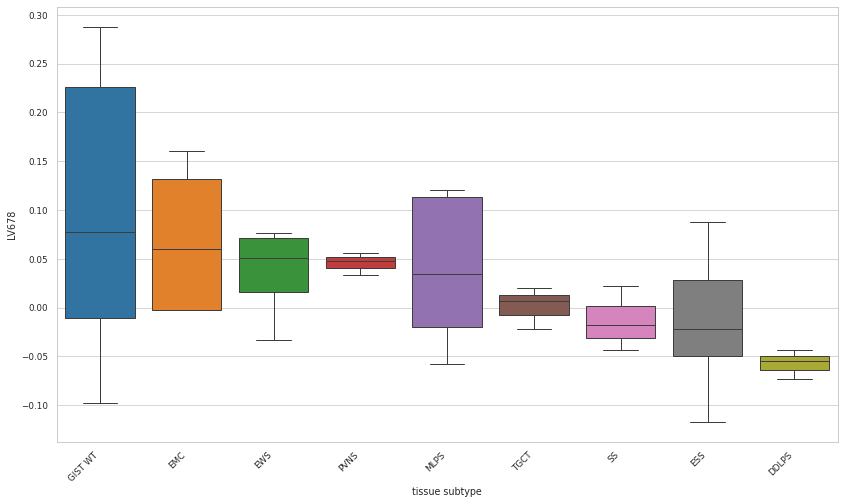

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP009862, SRP041788, SRP035391, SRP009266, SRP043962, SRP046749, SRP017933, SRP042161, SRP026315, SRP028815, SRP013725, SRP011185, SRP055569, SRP033135, SRP060416, SRP012461, SRP058773, SRP014620, SRP018838, SRP066834, SRP002487, SRP053052, SRP007461, SRP055810, SRP011924, SRP057196, SRP009374, SRP001563, SRP059775, SRP028301, SRP005177, SRP047476, SRP035599, SRP058840, SRP012056, SRP009247, SRP050365, SRP006475, SRP022920, SRP001540, SRP014428, SRP010350, SRP065559, SRP005174, SRP050147, SRP043417, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (43 != 46)
  warnings.warn(


''

30090_raw-Platelet_crit                                                                                                                          3.605779
22601_21213038-Job_coding_civil_engineer_transport_engineer_structural_engineer_borough_surveyor                                                 3.148857
platelet count                                                                                                                                   3.148512
3647-Duration_of_other_exercises                                                                                                                 3.062410
6146_2-Attendancedisabilitymobility_allowance_Disability_living_allowance                                                                        2.899172
L12_DERM_NAS-Other_and_unspecified_dermatitis                                                                                                    2.853533
20003_1140923346-Treatmentmedication_code_cocodamol                         

''

gene_name      LV64 gene_band
0    MRPS36  4.778725    5q13.2
1      MYL5  3.133090    4p16.3
2     PEX14  3.022315   1p36.22
3    COX6B1  2.707511  19q13.12
4     PFDN6  2.643474   6p21.32
5    COX7A2  2.407404    6q14.1
6      LSM7  2.368165   19p13.3
7     COX17  2.266831   3q13.33
8    NDUFS3  2.253541   11p11.2
9     ATP5O  2.174722  21q22.11

tissue       0.006402
cell type    0.004805
dtype: float64

array(['SRP017933', 'SRP066834', 'SRP011924', 'SRP057196', 'SRP014428',
       'SRP065559'], dtype=object)

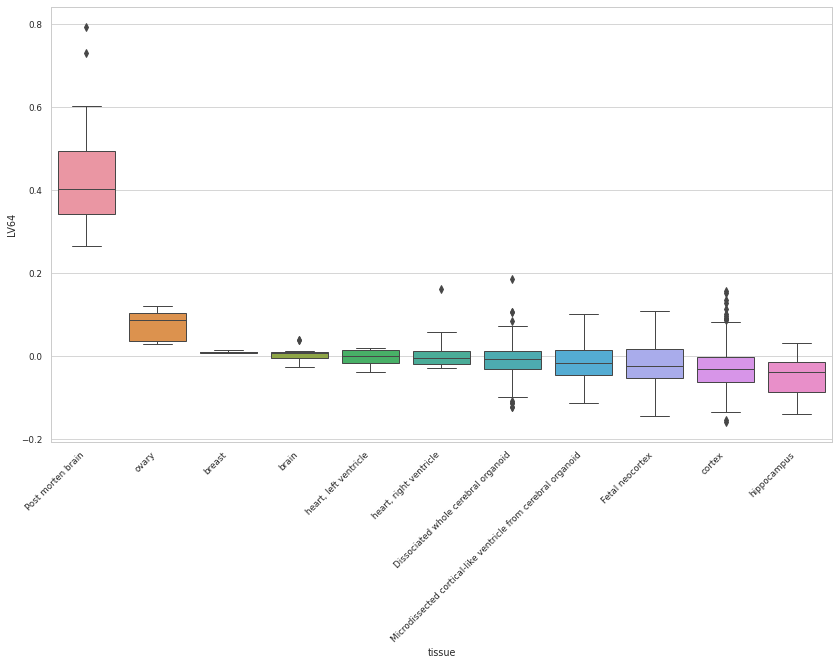

array(['SRP046749', 'SRP042161', 'SRP026315', 'SRP055569', 'SRP033135',
       'SRP060416', 'SRP012461', 'SRP014620', 'SRP053052', 'SRP057196',
       'SRP009374', 'SRP047476', 'SRP035599', 'SRP022920', 'SRP014428',
       'SRP050147'], dtype=object)

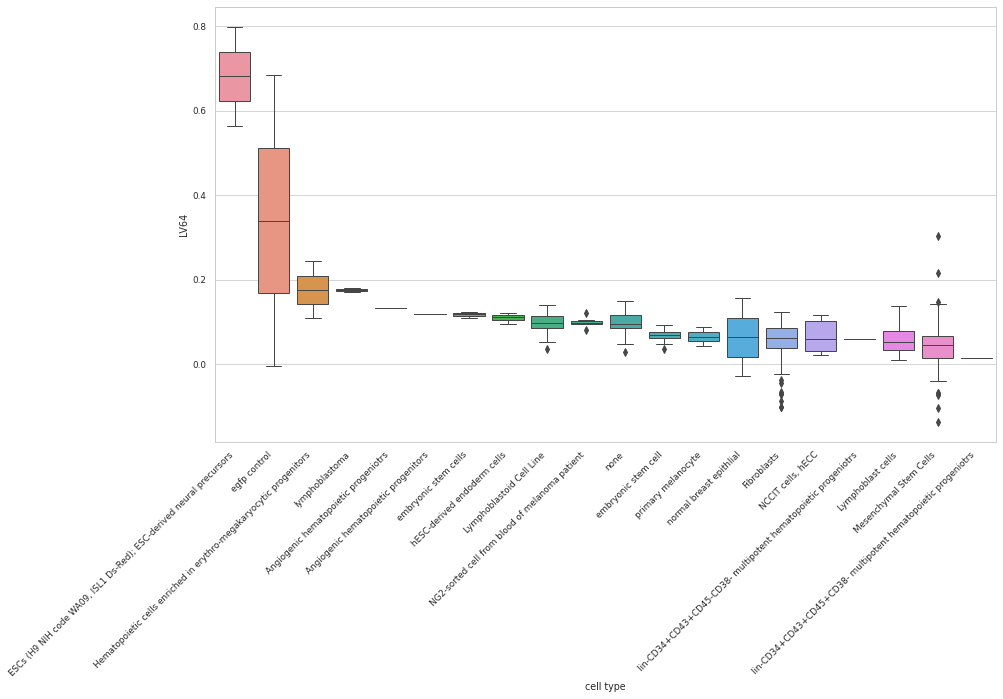

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP017933, SRP055569, SRP009862, SRP035391, SRP007947, SRP042161, SRP060416, SRP011185, SRP041788, SRP057196, SRP066834, SRP064259, SRP026315, SRP043962, SRP012461, SRP028815, SRP017575, SRP020661, SRP042620, SRP059775, SRP014428, SRP046749, SRP051844, SRP058181, SRP033135, SRP017959, SRP007338, SRP050499, SRP009247, SRP043364, SRP009266, SRP007351, SRP026620, SRP027383, SRP007359, SRP015668, SRP029334, SRP029889, SRP007862, SRP041094, SRP011924, SRP002326, SRP056477, SRP058773, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (41 != 44)
  warnings.warn(


''

3872_raw-Age_of_primiparous_women_at_birth_of_child                                                                                                               3.720529
2634-Duration_of_heavy_DIY                                                                                                                                        3.644054
20003_1141192414-Treatmentmedication_code_crestor_10mg_tablet                                                                                                     3.195468
1835-Mother_still_alive                                                                                                                                           3.176774
22601_12333358-Job_coding_hairdressing_or_beauty_salon_manager_or_proprietorowner                                                                                 3.147439
22601_11623349-Job_coding_storage_manager_stock_control_manager_container_terminal_manager                                                       

''

gene_name     LV897 gene_band
0     CCR10  5.235448   17q21.2
1  ATP6V1E1  3.245617  22q11.21
2   DYNC1I2  3.054762    2q31.1
3      SYF2  2.716760   1p36.11
4   SNRNP27  2.666987    2p13.3
5      MYL5  2.535663    4p16.3
6     SRP14  2.045264   15q15.1
7    CAB39L  2.014945   13q14.2
8   BHLHE41  2.010032   12p12.1
9     ATP5J  1.905758   21q21.3

tissue       0.042469
cell type    0.005055
dtype: float64

array(['SRP017933', 'SRP057196', 'SRP066834', 'SRP017575', 'SRP020661',
       'SRP042620', 'SRP014428', 'SRP051844', 'SRP058181', 'SRP007359',
       'SRP015668', 'SRP029889', 'SRP007862', 'SRP011924', 'SRP002326',
       'SRP056477'], dtype=object)

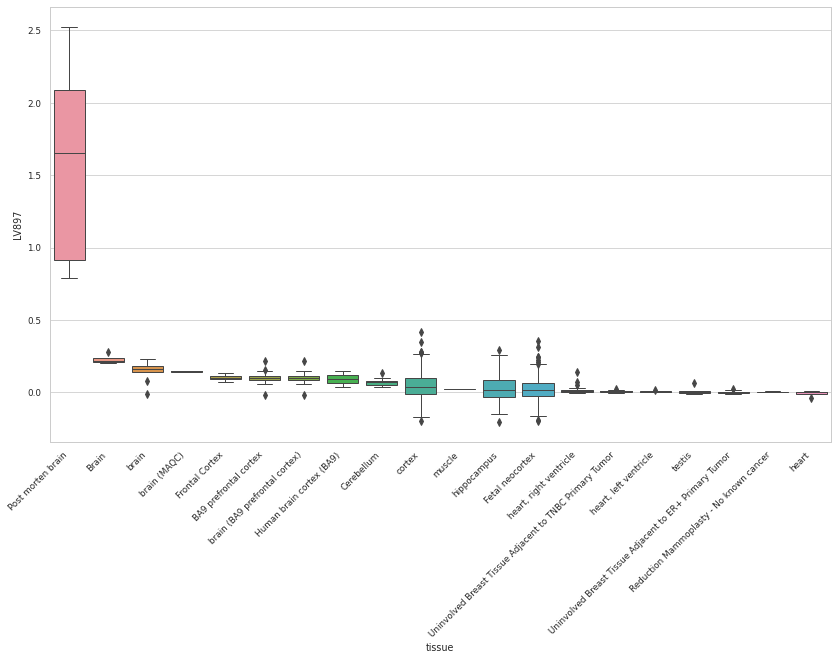

array(['SRP055569', 'SRP007947', 'SRP042161', 'SRP060416', 'SRP057196',
       'SRP064259', 'SRP026315', 'SRP012461', 'SRP014428', 'SRP046749',
       'SRP033135', 'SRP026620', 'SRP041094'], dtype=object)

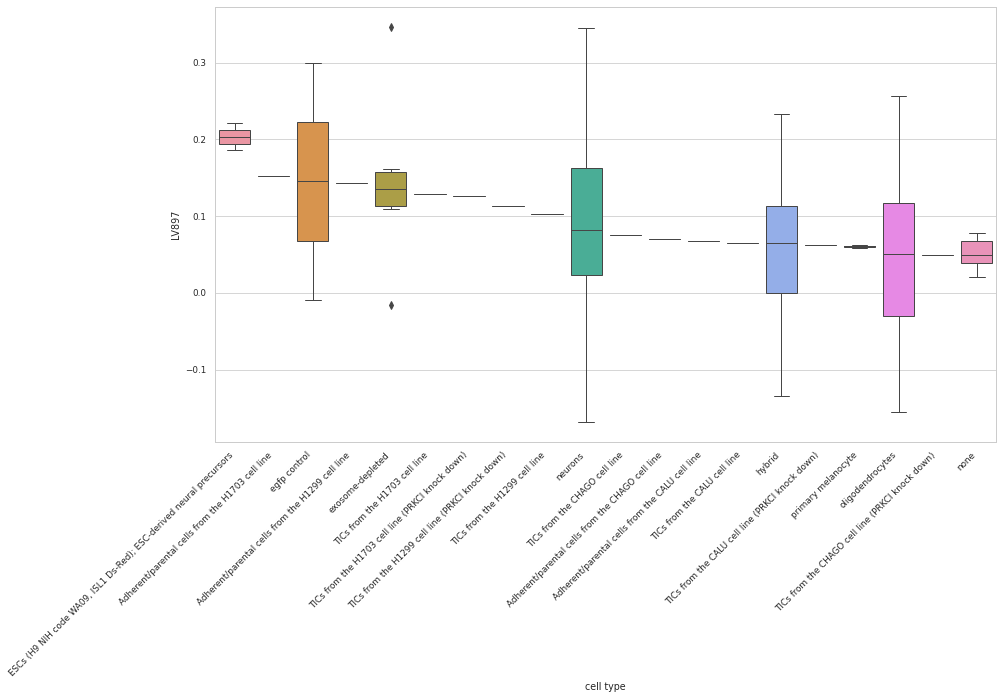

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP055569, SRP042161, SRP066834, SRP041846, SRP050499, SRP057196, SRP036821, SRP006575, SRP027383, SRP060416, SRP059950, SRP055513, SRP019994, SRP007359, SRP049061, SRP064464, SRP058773, SRP017575, SRP031507, SRP056696, SRP033466, SRP059379, SRP033135, SRP057205, SRP014739, SRP017972, SRP055153, SRP018838, SRP063840, SRP037982, SRP004847, SRP014620, SRP008145, SRP033276, SRP014428, SRP042184, SRP009266, SRP009862, SRP042218, SRP002079, SRP004637, SRP045869, SRP034626, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (41 != 43)
  warnings.warn(


''

1488_raw-Tea_intake                                                                                 5.200678
1498-Coffee_intake                                                                                  4.514611
H8_MYRINGNAS-Other_specifiedunspecified_disorders_of_tympanic_membrane                              4.263221
tympanic membrane disease                                                                           3.900062
6150_100-Vascularheart_problems_diagnosed_by_doctor_None_of_the_above                               3.857912
F05-Diagnoses_main_ICD10_F05_Delirium_not_induced_by_alcohol_and_other_psychoactive_substances      3.695671
4079_raw-Diastolic_blood_pressure_automated_reading                                                 3.510220
100390-Tea_consumed                                                                                 3.460910
20003_1140860696-Treatmentmedication_code_lisinopril                                                3.441639
1508_3-Coffee_type_

''

gene_name     LV575 gene_band
0       CSK  6.699166   15q24.1
1     DCTN2  4.397277   12q13.3
2     PMP22  4.165462     17p12
3    ATP2C1  3.691221    3q22.1
4    SHISA5  3.330353   3p21.31
5      CMAS  2.813336   12p12.1
6  TMEM176A  2.784225    7q36.1
7     BNIP2  2.705469   15q22.2
8    CDKN1A  2.343843    6p21.2
9     UBE2N  2.282433     12q22

cell type         0.024400
tissue subtype    0.002271
tissue            0.002141
dtype: float64

array(['SRP055569', 'SRP042161', 'SRP041846', 'SRP057196', 'SRP006575',
       'SRP060416', 'SRP049061', 'SRP031507', 'SRP059379', 'SRP033135',
       'SRP055153', 'SRP063840', 'SRP004847', 'SRP014620', 'SRP014428',
       'SRP042218'], dtype=object)

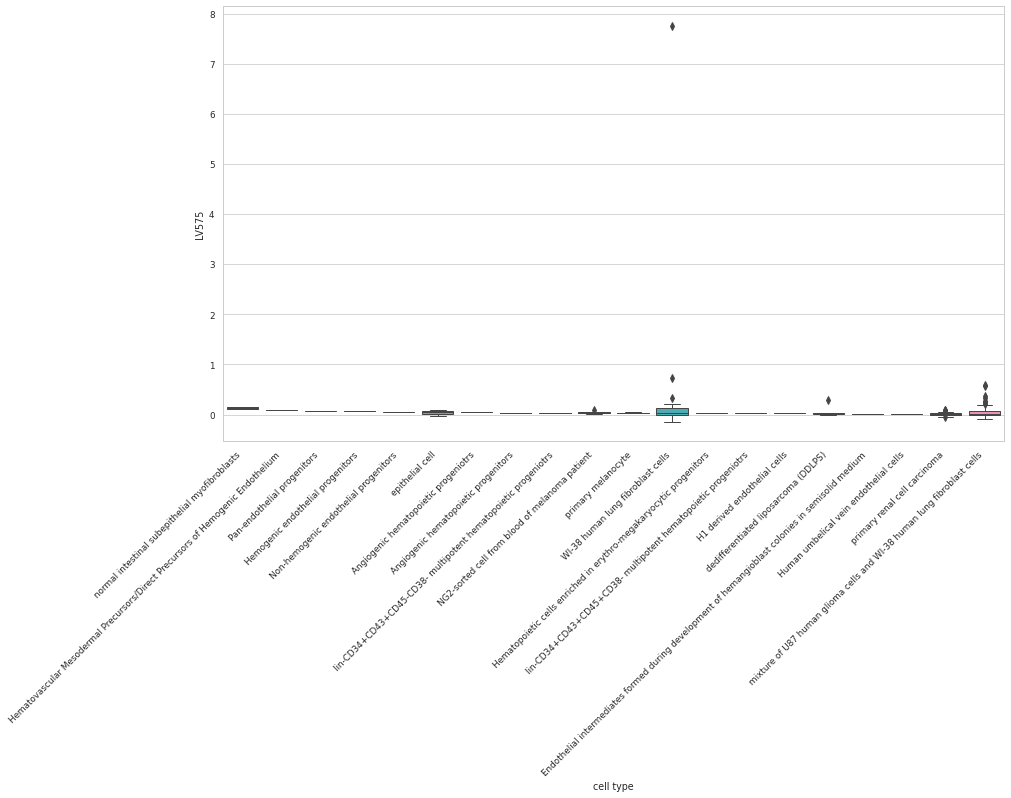

array(['SRP036821'], dtype=object)

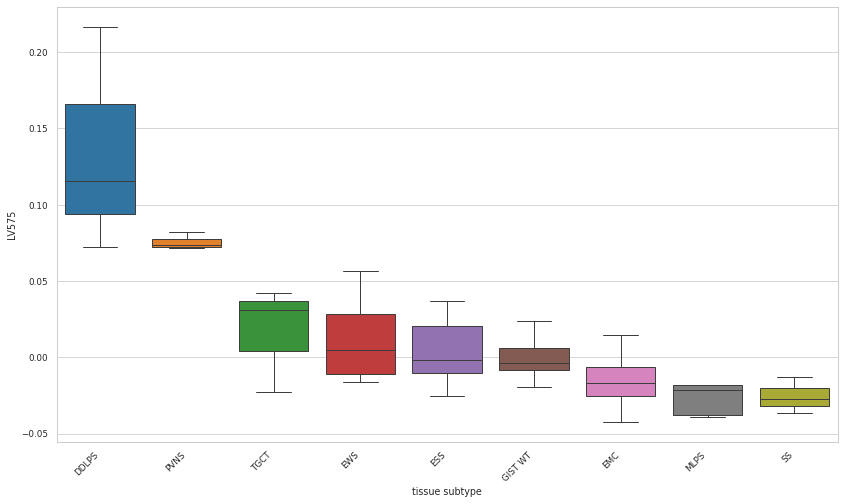

array(['SRP066834', 'SRP057196', 'SRP036821', 'SRP006575', 'SRP055513',
       'SRP019994', 'SRP007359', 'SRP017575', 'SRP056696', 'SRP014739',
       'SRP037982', 'SRP004847', 'SRP033276', 'SRP014428', 'SRP042218',
       'SRP004637', 'SRP045869'], dtype=object)

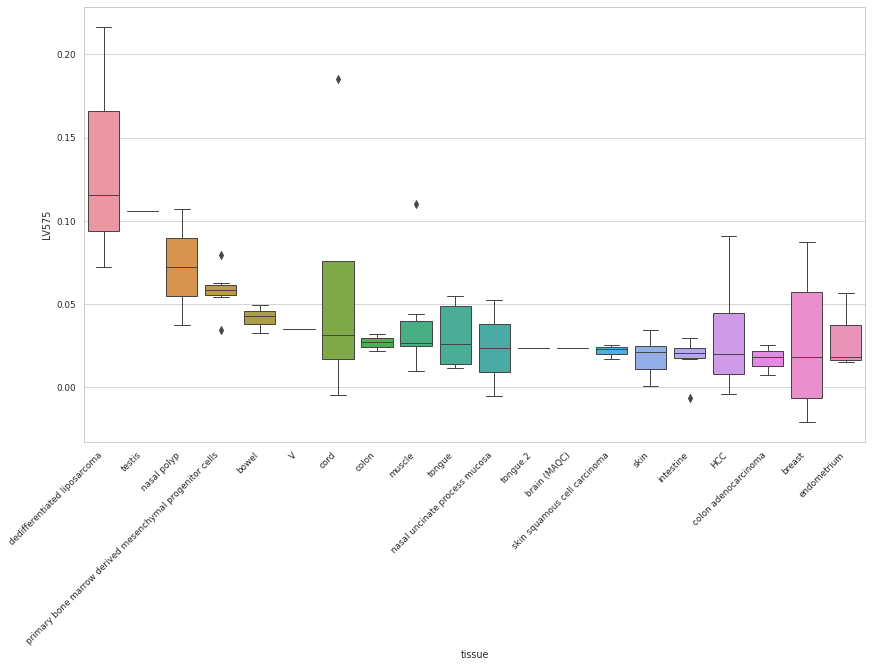

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP055569, SRP015449, SRP014428, SRP057196, SRP042161, SRP005279, SRP006769, SRP033135, SRP055810, SRP060416, SRP047192, SRP010350, SRP009266, SRP019994, SRP007947, SRP011546, SRP007338, SRP034953, SRP011924, SRP022259, SRP064464, SRP012056, SRP033276, SRP036821, SRP006575, SRP060708, SRP050499, SRP033566, SRP033119, SRP010038, SRP017575, SRP014213, SRP066834, SRP002184, SRP015013, SRP049500, SRP018525, SRP031459, SRP041833, SRP022892, SRP067214, SRP041396, SRP035478, SRP017138, SRP005177, SRP008145, SRP063834, SRP047082, SRP058977, SRP025982, SRP043033, SRP006475, SRP034543, SRP012546, SRP046233, SRP009276, SRP043417, SRP058773, SRP012557, SRP065202, SRP019936, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (59 != 61)
  warnings.warn(


''

1747_5-Hair_colour_natural_before_greying_Black                                               4.790751
2217_raw-Age_started_wearing_glasses_or_contact_lenses                                        3.980903
H7_CONJUNAS-Other_specified_and_unspecified_disorders_of_conjunctiva                          3.897707
XIX_INJURY_POISON-Injury_poisoning_and_certain_other_consequences_of_external_causes          3.464762
30230-Nucleated_red_blood_cell_percentage                                                     3.461488
stomatitis                                                                                    3.396426
L12_HYPETROPHICSCAR-Hypertrophic_scar                                                         3.348660
102800-Cheese_consumers                                                                       3.324626
30170-Nucleated_red_blood_cell_count                                                          3.308773
1747_3-Hair_colour_natural_before_greying_Light_brown                    

''

gene_name     LV736 gene_band
0     GALNT9  6.627370  12q24.33
1  GABARAPL1  5.355666   12p13.2
2      COX7C  4.548798    5q14.3
3     MRPL12  4.019938   17q25.3
4     NDUFB2  3.453354      7q34
5       RPS5  2.439662  19q13.43
6      CSTF3  2.192937     11p13
7       CBX4  1.813699   17q25.3
8      STK36  1.582341      2q35
9     NDUFS6  1.440229   5p15.33

cell type         0.022255
tissue            0.000884
tissue subtype    0.000691
tissue type       0.000188
dtype: float64

array(['SRP055569', 'SRP014428', 'SRP057196', 'SRP042161', 'SRP005279',
       'SRP033135', 'SRP060416', 'SRP047192', 'SRP007947', 'SRP011546',
       'SRP022259', 'SRP006575', 'SRP060708', 'SRP010038', 'SRP014213',
       'SRP002184', 'SRP049500', 'SRP018525', 'SRP041833', 'SRP063834',
       'SRP047082', 'SRP043033', 'SRP034543', 'SRP046233', 'SRP009276',
       'SRP065202'], dtype=object)

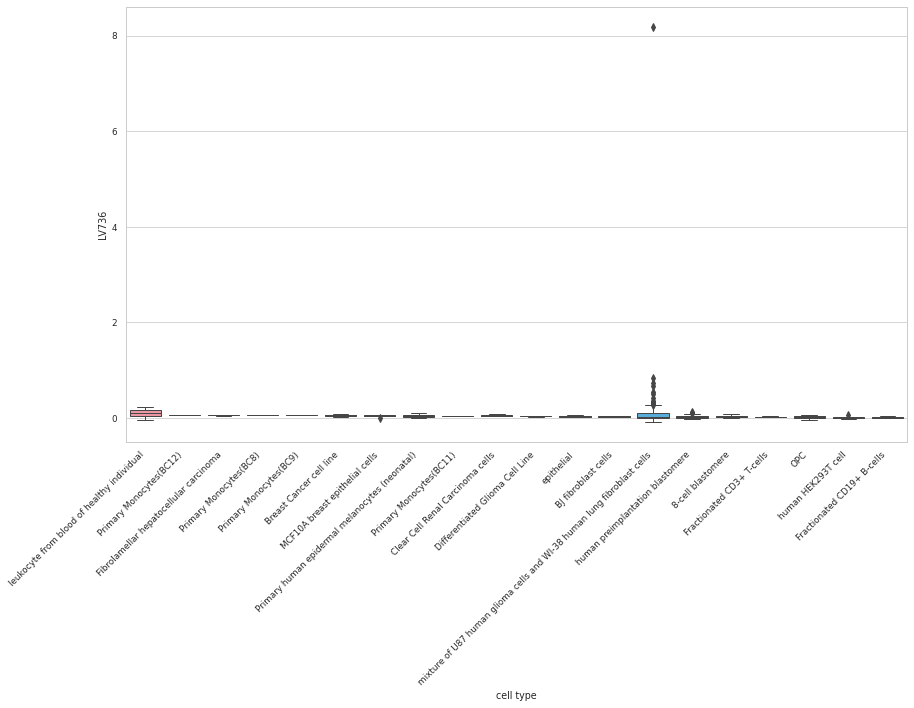

array(['SRP014428', 'SRP057196', 'SRP005279', 'SRP006769', 'SRP047192',
       'SRP019994', 'SRP011546', 'SRP034953', 'SRP011924', 'SRP033276',
       'SRP036821', 'SRP006575', 'SRP033566', 'SRP017575', 'SRP066834',
       'SRP031459', 'SRP012546'], dtype=object)

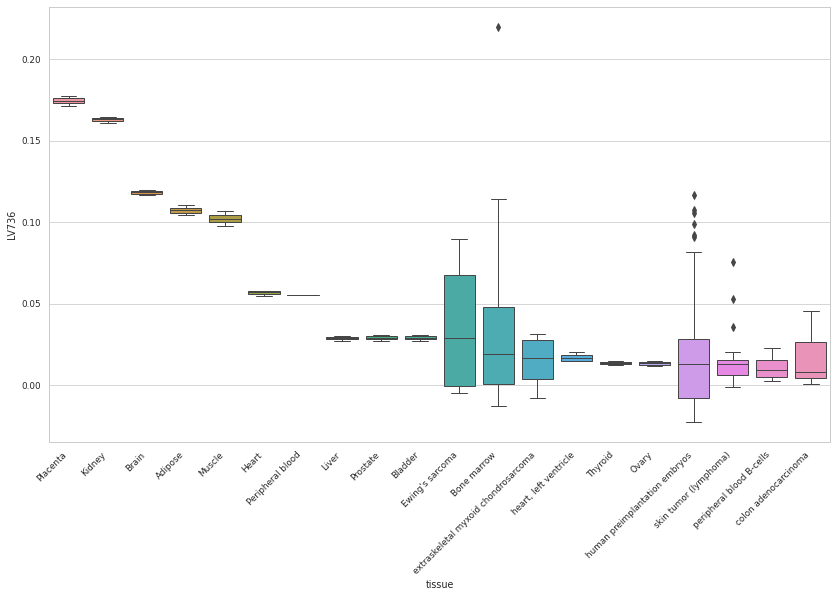

array(['SRP036821'], dtype=object)

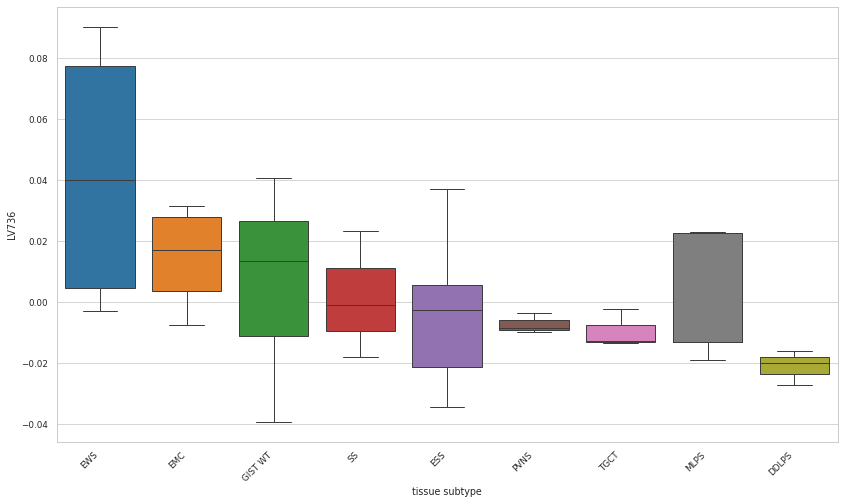

array(['SRP019936'], dtype=object)

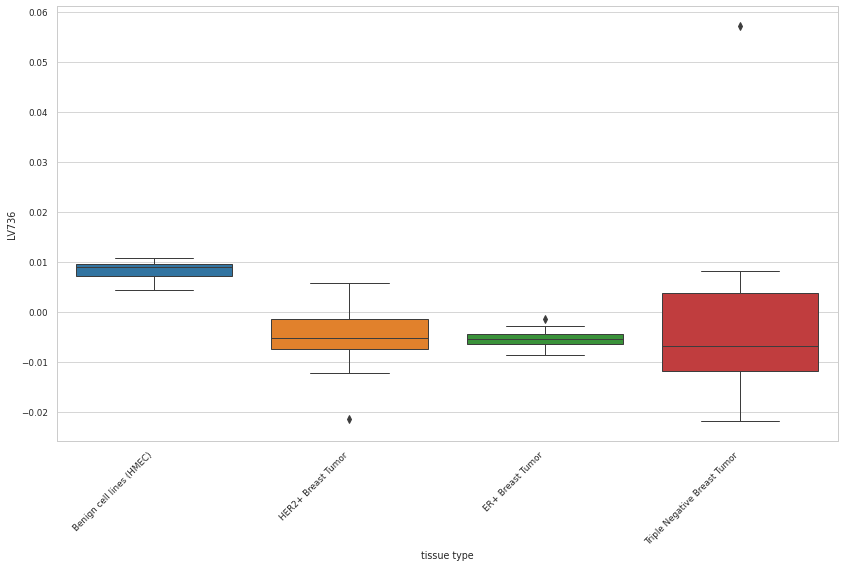

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP033135, SRP055569, SRP009266, SRP014624, SRP066834, SRP060416, SRP041846, SRP007508, SRP005279, SRP058773, SRP042161, SRP057196, SRP012461, SRP050499, SRP050992, SRP007338, SRP057205, SRP055153, SRP049097, SRP011578, SRP064259, SRP027383, SRP049238, SRP033119, SRP057852, SRP059170, SRP064464, SRP025982, SRP044668, SRP057500, SRP055810, SRP047192, SRP015853, SRP013363, SRP029334, SRP059379, SRP059775, SRP022892, SRP014591, SRP057248, SRP041036, SRP044956, SRP022920, SRP009862, SRP014428, SRP059035, SRP018838, SRP014670, SRP063070, SRP055513, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (47 != 50)
  warnings.warn(


''

20079_4-Dayofweek_questionnaire_completion_requested_Thursday                   4.064205
4825-Noisy_workplace                                                            3.652059
malaria                                                                         3.636179
cervicitis                                                                      3.281048
22506_112-Tobacco_smoking_Occasionally                                          3.253101
L12_INFECT_SKIN_OTHER-Other_local_infections_of_skin_and_subcutaneous_tissue    3.251002
20003_1140862380-Treatmentmedication_code_becloforte_250micrograms_inhaler      3.197421
leukemia                                                                        3.179749
G6_PLANTAR-Lesion_of_plantar_nerve                                              3.104162
20003_1140879792-Treatmentmedication_code_terbutaline                           3.047529
20113_9-Illnesses_of_adopted_mother_Diabetes                                    3.012949
2624-Frequency_of_hea

''

gene_name     LV157 gene_band
0      BCOR  8.091551       NaN
1     DCTN5  6.769771   16p12.2
2    CTDSP2  6.735976   12q14.1
3    NDUFA7  6.388086   19p13.2
4    NDUFV2  6.130586  18p11.22
5     PAM16  6.056061   16p13.3
6     CCNG1  4.017813      5q34
7      OAZ1  3.590467   19p13.3
8      TTC5  3.087325   14q11.2
9     RPL15  2.595010    3p24.2

cell type      0.035976
tissue         0.000913
tissue type    0.000299
dtype: float64

array(['SRP033135', 'SRP055569', 'SRP060416', 'SRP041846', 'SRP007508',
       'SRP005279', 'SRP042161', 'SRP057196', 'SRP012461', 'SRP050992',
       'SRP055153', 'SRP011578', 'SRP064259', 'SRP049238', 'SRP057852',
       'SRP059170', 'SRP057500', 'SRP047192', 'SRP015853', 'SRP059379',
       'SRP022920', 'SRP014428', 'SRP059035', 'SRP014670'], dtype=object)

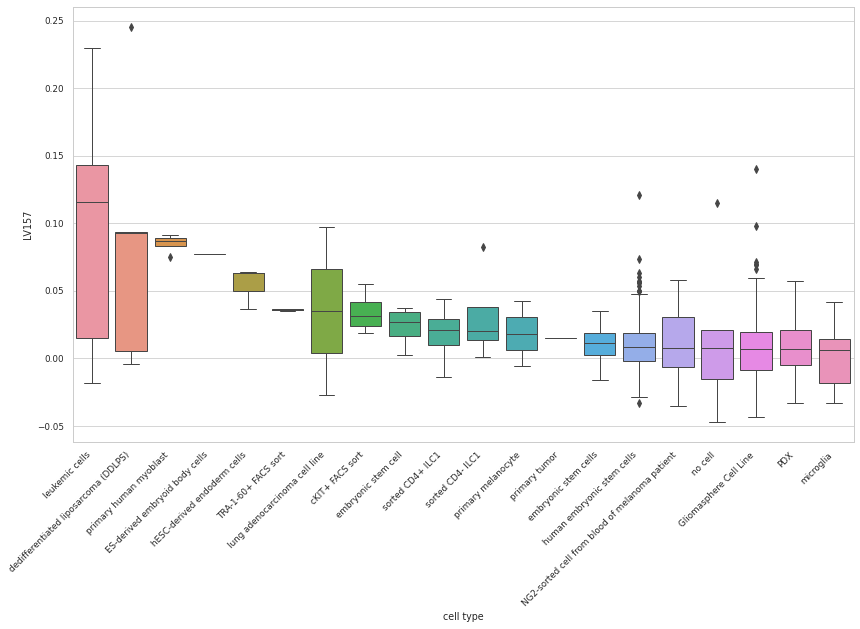

array(['SRP066834', 'SRP005279', 'SRP057196', 'SRP049097', 'SRP059170',
       'SRP057500', 'SRP047192', 'SRP044956', 'SRP014428', 'SRP014670',
       'SRP063070', 'SRP055513'], dtype=object)

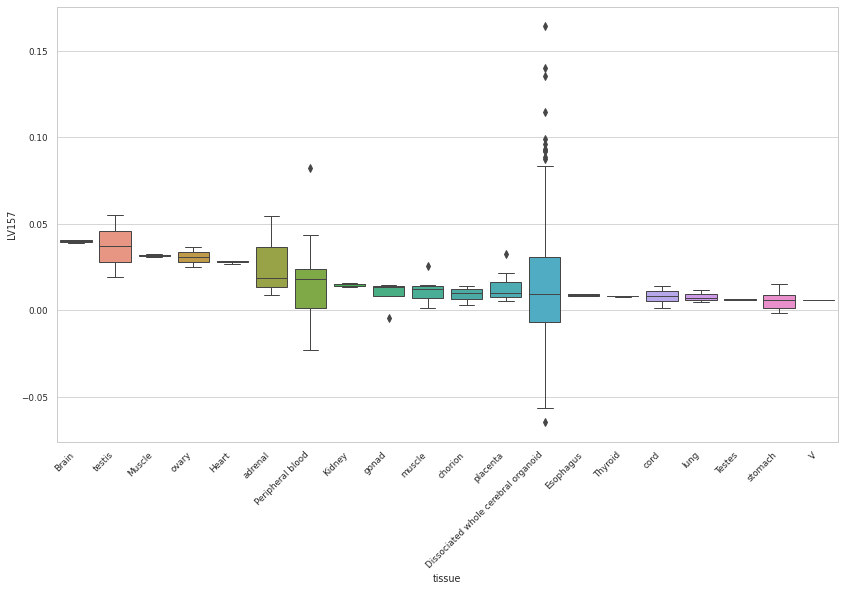

array(['SRP049097', 'SRP044668', 'SRP044956'], dtype=object)

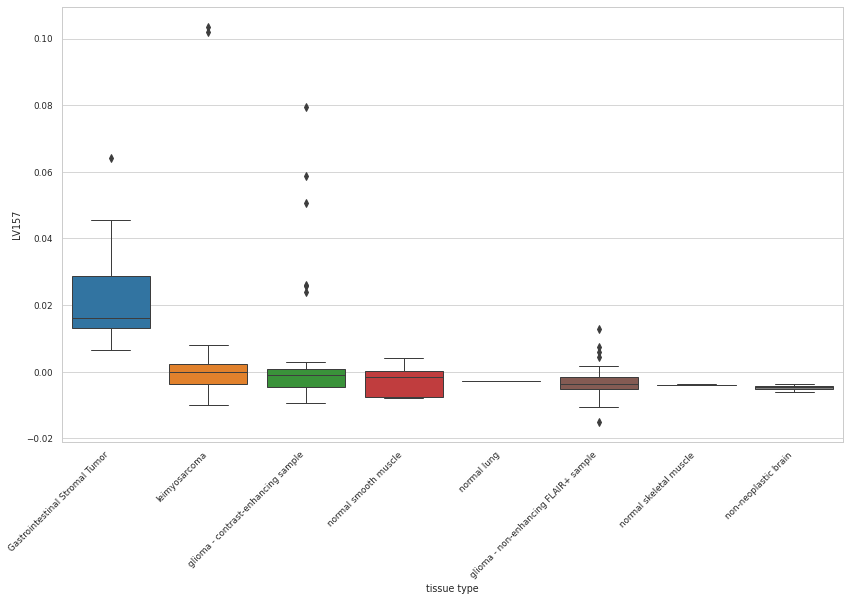

pathway LV index       AUC  p-value       FDR
1217  PID_ATR_PATHWAY      421  0.733827  0.00869  0.042095

SRP042161, SRP013363, SRP055569, SRP018837, SRP060416, SRP012461, SRP066834, SRP011054, SRP005279, SRP010166, SRP050499, SRP009247, SRP022892, SRP033135, SRP057196, SRP059379, SRP049203, SRP050992, SRP058773, SRP020486, SRP059775, SRP032775, SRP015668, SRP055810, SRP055153, SRP012557, SRP014620, SRP062177, SRP064464, SRP002184, SRP017411, SRP011546, SRP063840, SRP036821, SRP027383, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (34 != 35)
  warnings.warn(


''

3082-Fractured_heel                                                                                                   4.252928
20551_3-Substance_of_prescription_or_overthecounter_medication_addiction_Something_else                               3.547939
20533-Trouble_falling_asleep                                                                                          3.523314
20003_1140872338-Treatmentmedication_code_madopar_625_capsule                                                         3.208976
6147_6-Reason_for_glassescontact_lenses_For_a_lazy_eye_or_an_eye_with_poor_vision_since_childhood_called_amblyopia    3.192606
3476-Difficulty_not_smoking_for_1_day                                                                                 3.044714
20003_1140923336-Treatmentmedication_code_cotenidone                                                                  2.987844
22617_4122-Job_SOC_coding_Accounts_and_wages_clerks_bookkeepers_other_financial_clerks                         

''

gene_name     LV421 gene_band
0   SLC18A1  6.614586    8p21.3
1      HUS1  3.838521    7p12.3
2    ZNF202  3.677102   11q24.1
3   PPP2R2B  3.073113      5q32
4     DHRS4  3.015718   14q11.2
5    LRSAM1  2.802076    9q33.3
6     MRPS9  2.799351    2q12.1
7     SOCS2  2.665875     12q22
8    MAD2L2  2.581676   1p36.22
9    ANAPC7  2.140283  12q24.11

cell type         0.022372
tissue            0.002902
tissue subtype    0.000501
dtype: float64

array(['SRP042161', 'SRP055569', 'SRP060416', 'SRP012461', 'SRP011054',
       'SRP005279', 'SRP010166', 'SRP033135', 'SRP057196', 'SRP059379',
       'SRP049203', 'SRP050992', 'SRP055153', 'SRP014620', 'SRP062177',
       'SRP002184', 'SRP017411', 'SRP011546', 'SRP063840'], dtype=object)

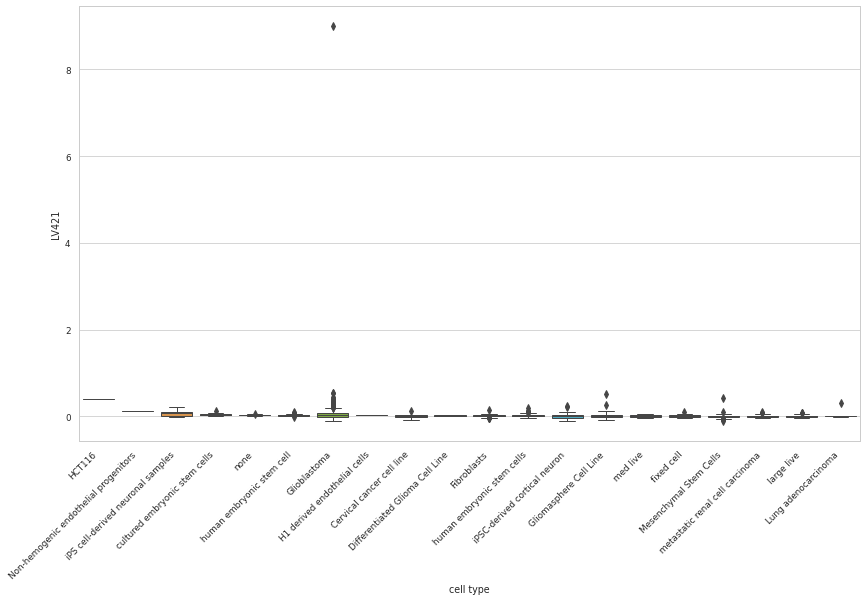

array(['SRP066834', 'SRP005279', 'SRP057196', 'SRP020486', 'SRP032775',
       'SRP015668', 'SRP011546', 'SRP036821'], dtype=object)

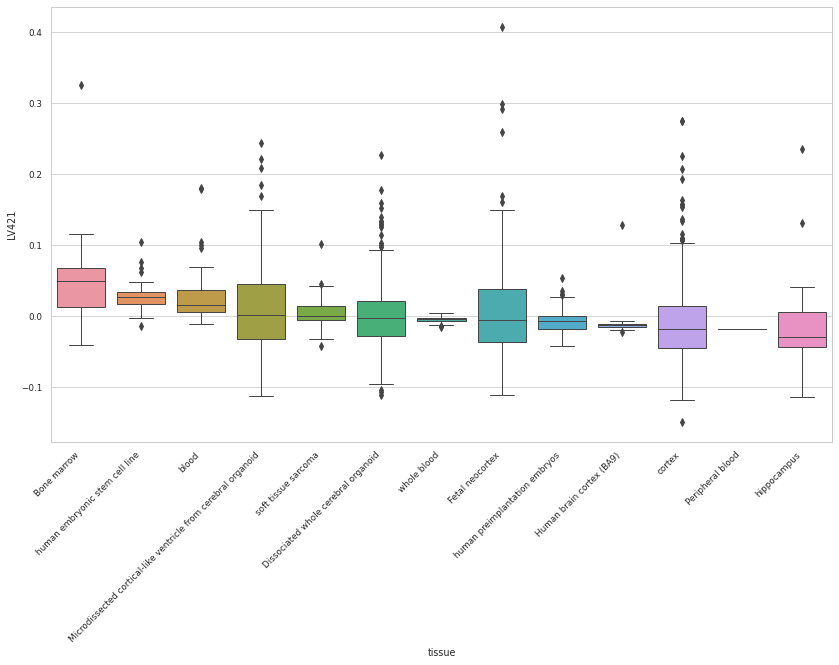

array(['SRP036821'], dtype=object)

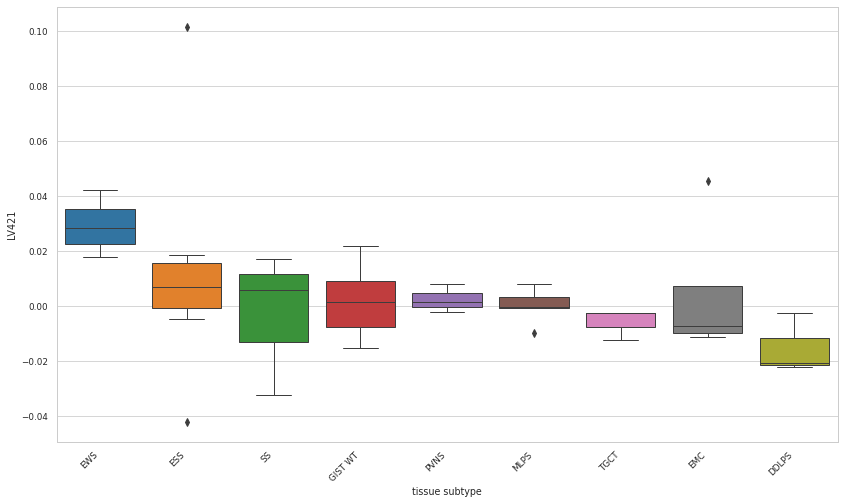

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP055569, SRP042218, SRP060416, SRP066834, SRP042161, SRP057196, SRP018853, SRP033135, SRP009266, SRP050499, SRP011185, SRP005279, SRP055810, SRP059035, SRP064464, SRP058773, SRP012461, SRP008775, SRP007947, SRP050992, SRP007338, SRP003726, SRP017933, SRP015670, SRP002915, SRP055153, SRP014620, SRP030617, SRP009862, SRP018719, SRP031507, SRP062177, SRP059948, SRP013239, SRP018525, SRP044206, SRP008145, SRP034543, SRP026315, SRP002487, SRP045869, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (39 != 41)
  warnings.warn(


''

celiac disease                                                                                           3.875392
40001_C56-Underlying_primary_cause_of_death_ICD10_C56_Malignant_neoplasm_of_ovary                        3.584977
20003_1140879854-Treatmentmedication_code_sotalol                                                        3.543755
adrenocortical insufficiency                                                                             3.484741
H7_PARASTRAB-Paralytic_strabismus                                                                        3.412516
22617_8124-Job_SOC_coding_Energy_plant_operatives                                                        3.277912
20107_101-Illnesses_of_father_None_of_the_above_group_2                                                  3.185424
paralytic strabismus                                                                                     3.181795
20492-Longest_period_of_mania_or_irritability                                           

''

gene_name     LV469 gene_band
0     ATRIP  6.037372   3p21.31
1    SAMM50  3.330478  22q13.31
2   TPD52L1  3.231100   6q22.31
3      PPIH  2.859495    1p34.2
4     ZNRD1  2.650325    6p22.1
5     PHPT1  2.566628    9q34.3
6       PNN  2.019163   14q21.1
7      ELF1  1.760811  13q14.11
8      HADH  1.637516      4q25
9     DCTN3  1.614403    9p13.3

cell type    0.016036
tissue       0.005324
dtype: float64

array(['SRP055569', 'SRP042218', 'SRP060416', 'SRP042161', 'SRP057196',
       'SRP033135', 'SRP005279', 'SRP059035', 'SRP012461', 'SRP008775',
       'SRP007947', 'SRP050992', 'SRP003726', 'SRP015670', 'SRP055153',
       'SRP014620', 'SRP031507', 'SRP062177', 'SRP018525', 'SRP044206',
       'SRP034543', 'SRP026315'], dtype=object)

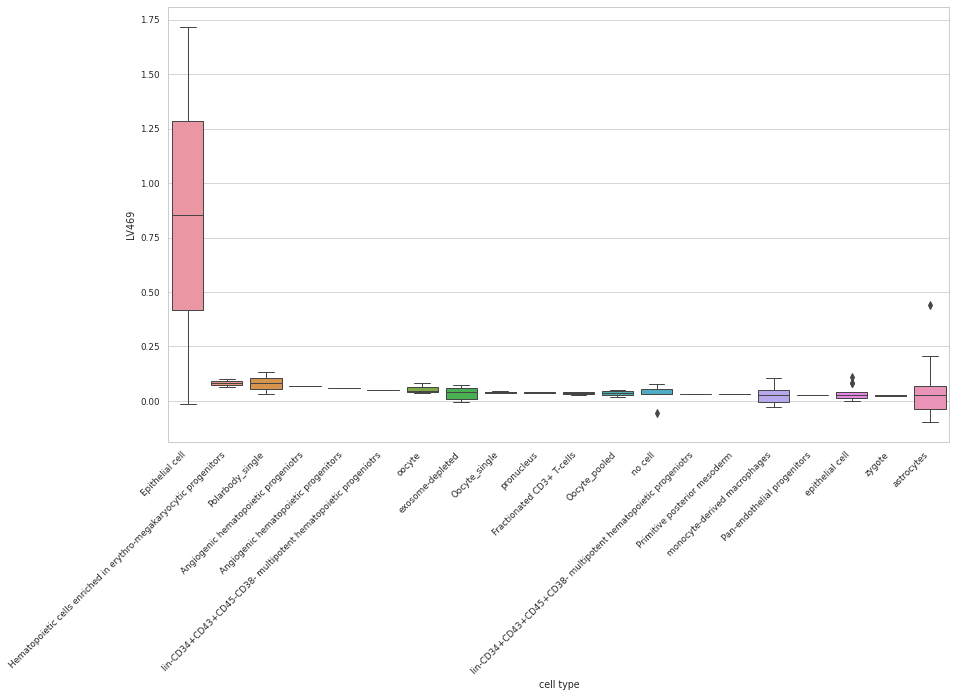

array(['SRP042218', 'SRP066834', 'SRP057196', 'SRP005279', 'SRP003726',
       'SRP017933', 'SRP045869'], dtype=object)

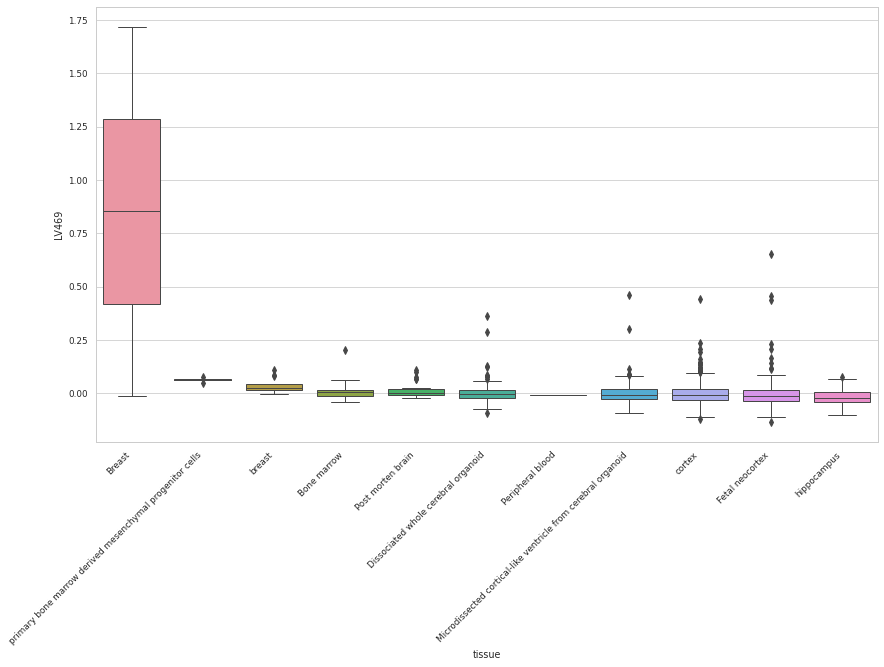

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP055569, SRP057196, SRP033135, SRP042161, SRP015449, SRP055153, SRP041036, SRP060416, SRP011578, SRP024268, SRP015668, SRP063840, SRP050499, SRP014428, SRP059035, SRP039361, SRP007947, SRP015013, SRP009266, SRP015853, SRP058773, SRP055513, SRP066834, SRP042620, SRP012461, SRP064464, SRP007359, SRP051595, SRP009247, SRP025982, SRP064481, SRP007596, SRP058351, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (32 != 33)
  warnings.warn(


''

30110_raw-Platelet_distribution_width                                                     4.925752
23108_raw-Impedance_of_leg_left                                                           3.648619
20003_1140860696-Treatmentmedication_code_lisinopril                                      3.611467
23107_raw-Impedance_of_leg_right                                                          3.472511
22617_3221-Job_SOC_coding_Physiotherapists                                                3.423961
mastitis                                                                                  3.385084
22601_32213078-Job_coding_physiotherapist                                                 3.307757
20003_1141150750-Treatmentmedication_code_brimonidine_tartrate                            3.250613
6155_4-Vitamin_and_mineral_supplements_Vitamin_D                                          3.201711
23106_raw-Impedance_of_whole_body                                                         3.144780
H8_VERTIGO

''

gene_name     LV250 gene_band
0    PNPLA2  8.070305   11p15.5
1      HRH1  6.641049    3p25.3
2      KIF9  5.309839   3p21.31
3     VAMP2  5.301271   17p13.1
4     AP4M1  3.489196    7q22.1
5      NEU1  3.350350   6p21.33
6      TAF6  3.156964    7q22.1
7    CUEDC1  2.376140     17q22
8    TUBA1B  2.367872  12q13.12
9     RARS2  2.211408      6q15

cell type    0.032749
tissue       0.001236
dtype: float64

array(['SRP055569', 'SRP057196', 'SRP033135', 'SRP042161', 'SRP055153',
       'SRP060416', 'SRP011578', 'SRP063840', 'SRP014428', 'SRP059035',
       'SRP039361', 'SRP007947', 'SRP015853', 'SRP012461', 'SRP007596'],
      dtype=object)

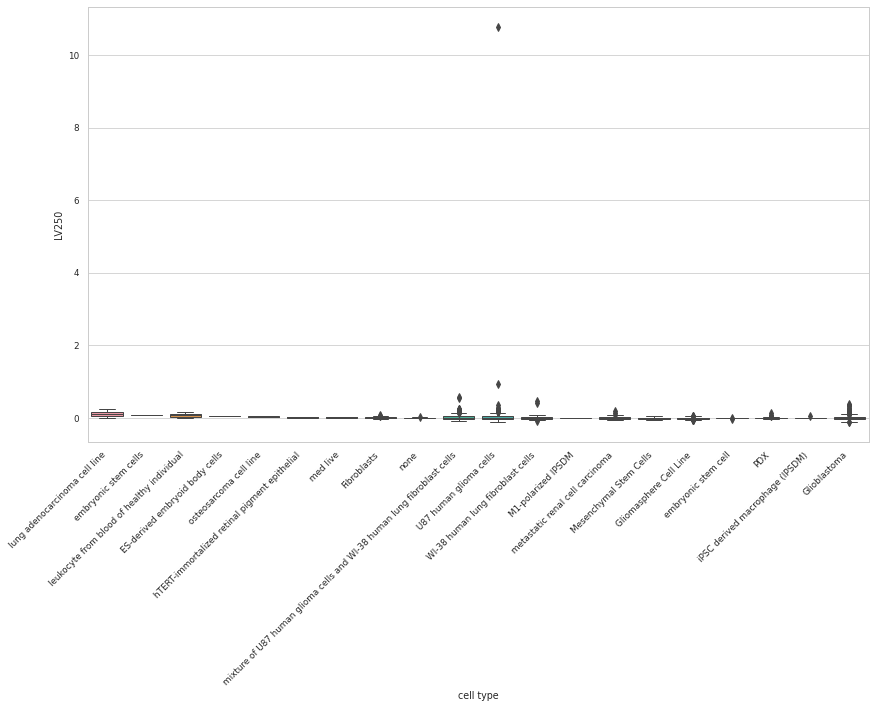

array(['SRP057196', 'SRP024268', 'SRP015668', 'SRP014428', 'SRP055513',
       'SRP066834', 'SRP042620', 'SRP007359', 'SRP051595', 'SRP058351'],
      dtype=object)

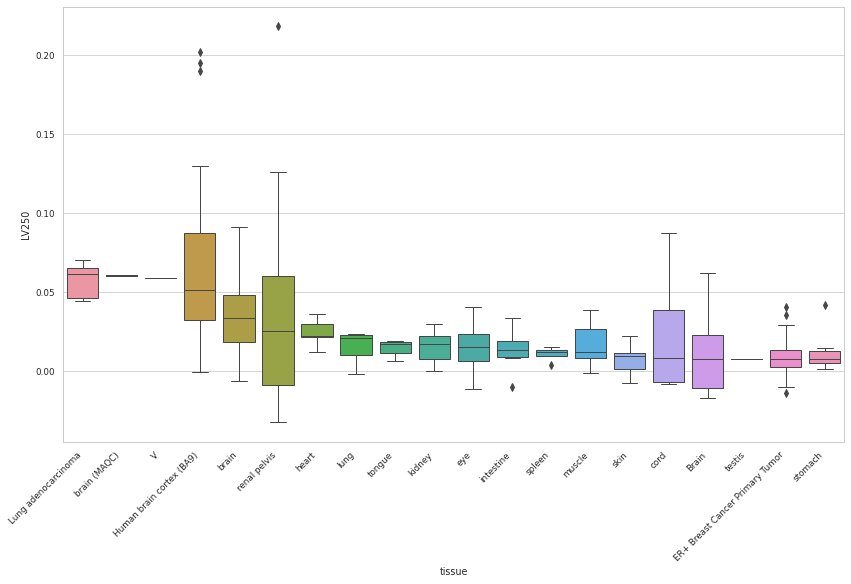

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP058773, SRP060416, SRP005279, SRP064464, SRP055569, SRP057196, SRP057852, SRP064259, SRP066834, SRP024268, SRP042161, SRP057248, SRP014487, SRP014213, SRP033135, SRP045659, SRP055153, SRP019207, SRP041833, SRP067173, SRP020646, SRP043085, SRP055810, SRP056049, SRP057205, SRP018020, SRP026537, SRP056733, SRP056295, SRP056098, SRP048759, SRP068523, SRP050499, SRP036821, SRP059379, SRP030617, SRP002184, SRP022591, SRP059775, SRP050992, SRP008218, SRP033248, SRP018853, SRP053246, SRP063840, SRP018525, SRP029656, SRP018837, SRP042620, SRP045352, SRP008145, 

''

20003_1140911640-Treatmentmedication_code_lecithin_product                4.247985
somatoform disorder                                                       4.068040
20003_1140888390-Treatmentmedication_code_ferrous_salt_product            3.277558
20090_363-Type_of_fatoil_used_in_cooking_Unknown_fat_butter               3.272502
SFN-Small_fibre_neuropathy                                                3.144017
102400-Savoury_snack_consumers                                            3.132480
dry eye syndrome                                                          3.037951
3942-Adopted_mother_still_alive                                           2.992769
L12_OTHERMELANIN-Other_melanin_hyperpigmentation                          2.925342
20003_1140865382-Treatmentmedication_code_merbentyl_10mg_tablet           2.799392
22617_2419-Job_SOC_coding_Legal_professionals_nec                         2.796406
20003_1141171496-Treatmentmedication_code_trospium                        2.789213
4288

''

gene_name     LV420 gene_band
0    SEC24B  4.992110      4q25
1      DCP2  4.900183    5q22.2
2      CCR8  4.075553    3p22.1
3     SAP30  3.665104    4q34.1
4      TAF2  3.476207   8q24.12
5      NINL  3.145995  20p11.21
6      NXF1  2.709774   11q12.3
7     TNIP3  2.291252      4q27
8     IMPA2  2.089676  18p11.21
9     NAGPA  1.994271   16p13.3

tissue            0.003029
cell type         0.002761
tissue subtype    0.000569
dtype: float64

array(['SRP005279', 'SRP057196', 'SRP066834', 'SRP024268', 'SRP014487',
       'SRP043085', 'SRP056295', 'SRP048759', 'SRP036821', 'SRP008218',
       'SRP033248', 'SRP042620'], dtype=object)

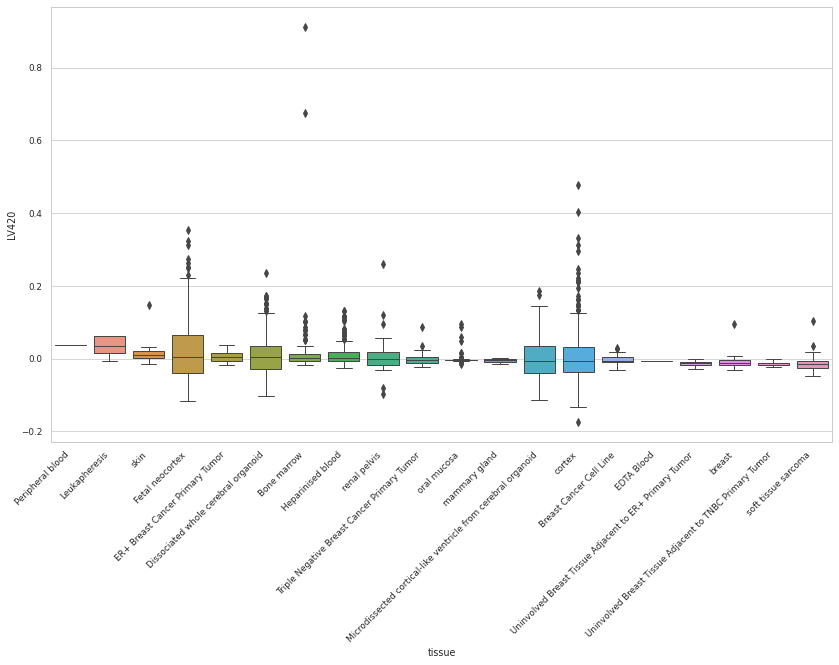

array(['SRP060416', 'SRP005279', 'SRP055569', 'SRP057196', 'SRP057852',
       'SRP064259', 'SRP042161', 'SRP014487', 'SRP014213', 'SRP033135',
       'SRP055153', 'SRP041833', 'SRP043085', 'SRP026537', 'SRP056295',
       'SRP048759', 'SRP068523', 'SRP059379', 'SRP002184', 'SRP050992',
       'SRP008218', 'SRP053246', 'SRP063840', 'SRP018525', 'SRP045352'],
      dtype=object)

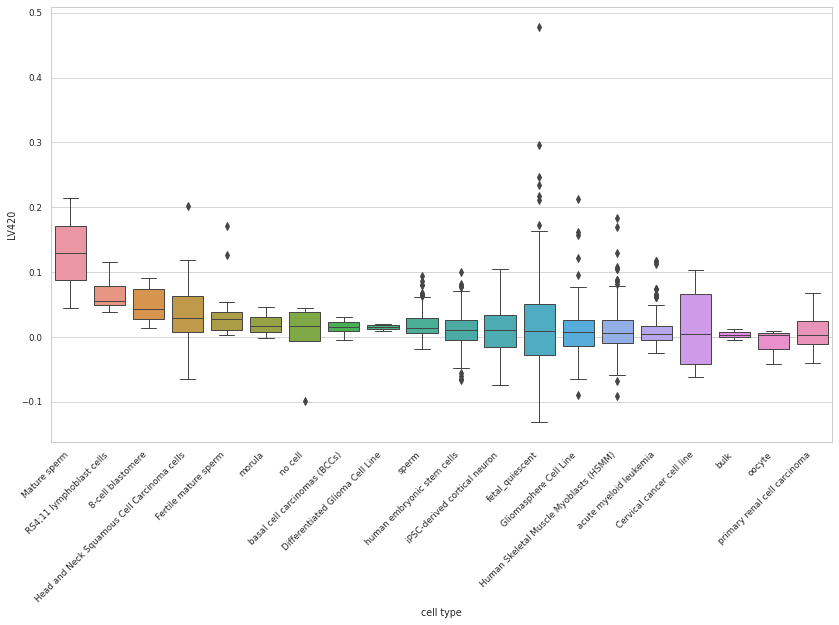

array(['SRP036821'], dtype=object)

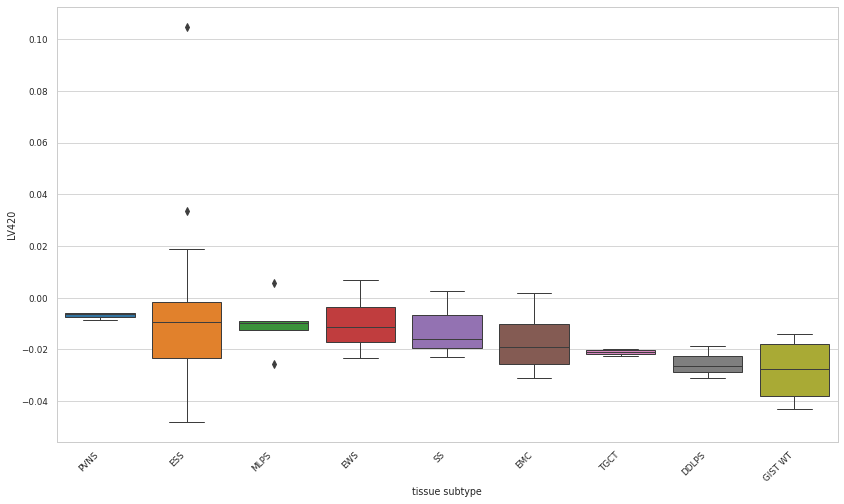

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP055569, SRP042161, SRP057196, SRP060416, SRP033135, SRP066834, SRP015013, SRP055153, SRP030617, SRP059775, SRP059379, SRP007498, SRP064464, SRP042218, SRP055513, SRP002487, SRP012099, SRP015449, SRP009247, SRP012098, SRP011054, SRP007359, SRP050499, SRP015964, SRP018838, SRP007338, SRP051688, SRP025982, SRP057248, SRP022133, SRP014320, SRP007947, SRP007461, SRP061241, SRP059172, SRP023262, SRP026537, SRP059735, SRP058773, SRP044286, SRP007412, SRP059732, SRP042620, SRP044611, SRP003726, SRP045869, SRP004637, SRP038863, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (46 != 48)
  warnings.warn(


''

78_raw-Heel_bone_mineral_density_BMD_Tscore_automated                                                                                         3.665418
3147_raw-Heel_quantitative_ultrasound_index_QUI_direct_entry                                                                                  3.665271
3148_raw-Heel_bone_mineral_density_BMD                                                                                                        3.642002
H7_ENTROPION-Entropion_and_trichiasis_of_eyelid                                                                                               3.566545
2704-Years_since_last_cervical_smear_test                                                                                                     3.531452
OTHER_ILD_CVD_COMORB-Other_ILDrelated_CVDcomorbidities                                                                                        3.445312
22601_11313221-Job_coding_financial_services_manager_chartered_secretary_banker_merchant_or_in

''

gene_name     LV558 gene_band
0    AGPAT3  7.883150   21q22.3
1   ARHGAP1  7.044860   11p11.2
2      MTF1  4.415134    1p34.3
3     RBM15  3.324338    1p13.3
4      HAGH  3.313261   16p13.3
5   POLDIP3  2.648371   22q13.2
6    ZNF213  1.914267   16p13.3
7      ARF3  1.351537  12q13.12
8      HPS1  1.228220   10q24.2
9   ADAMTS2  1.176982    5q35.3

cell type       0.027451
tissue          0.001241
cell subtype    0.000492
dtype: float64

array(['SRP055569', 'SRP042161', 'SRP057196', 'SRP060416', 'SRP033135',
       'SRP055153', 'SRP059379', 'SRP042218', 'SRP011054', 'SRP051688',
       'SRP007947', 'SRP026537', 'SRP059735', 'SRP044286', 'SRP044611',
       'SRP003726'], dtype=object)

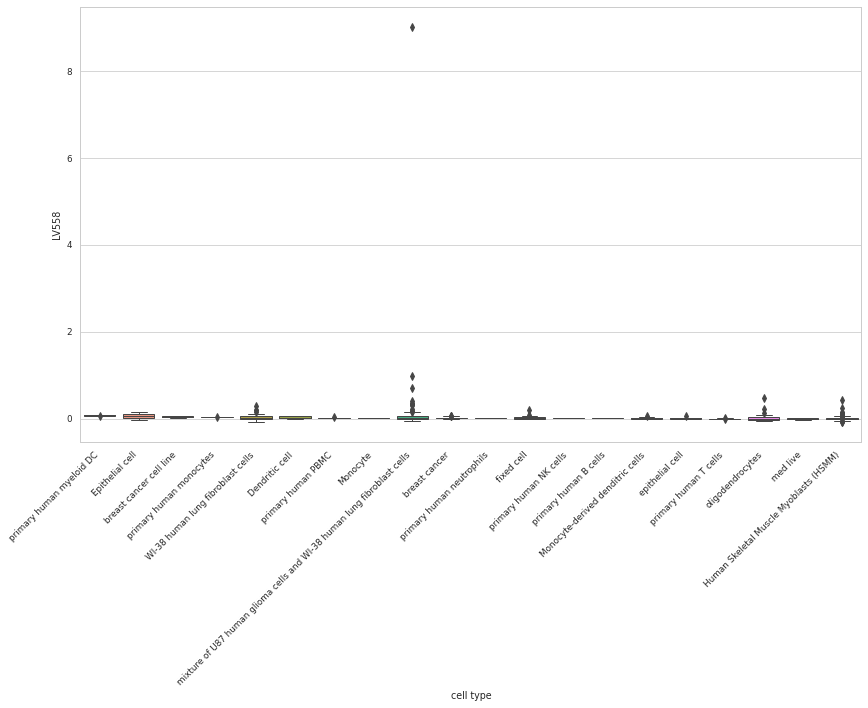

array(['SRP057196', 'SRP066834', 'SRP042218', 'SRP055513', 'SRP007359',
       'SRP022133', 'SRP061241', 'SRP059172', 'SRP023262', 'SRP059735',
       'SRP042620', 'SRP003726', 'SRP045869', 'SRP004637'], dtype=object)

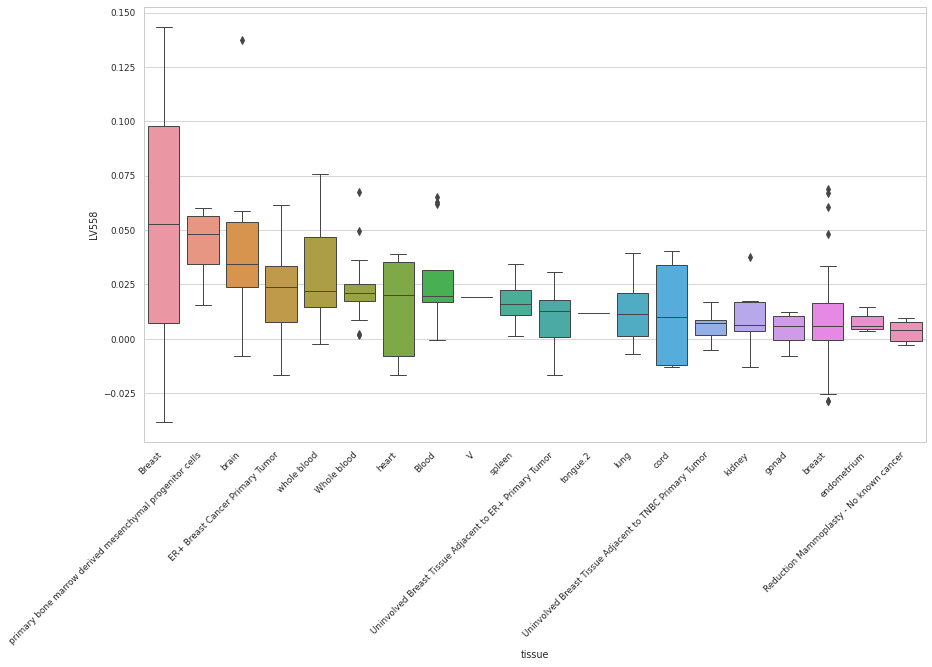

array(['SRP059735'], dtype=object)

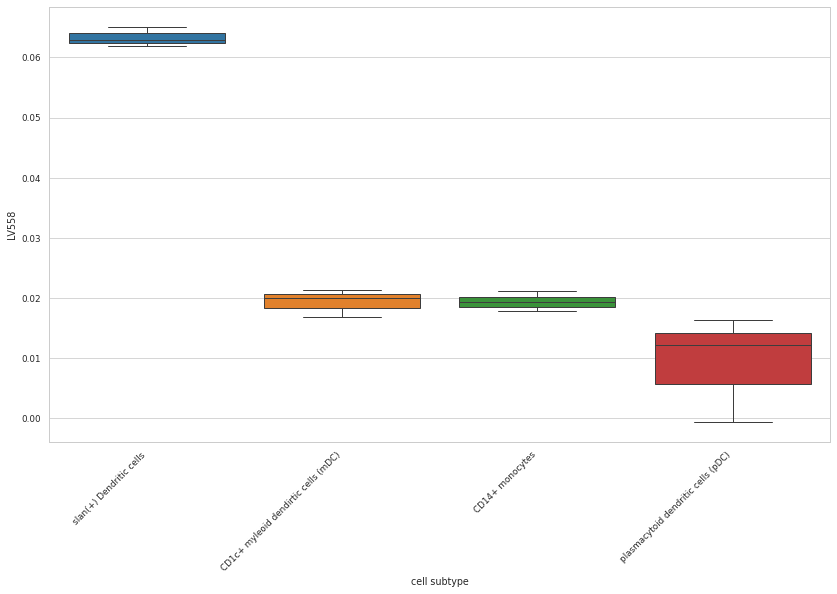

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP055569, SRP033135, SRP007947, SRP031507, SRP015013, SRP057196, SRP050499, SRP058773, SRP042218, SRP060416, SRP006717, SRP066834, SRP042161, SRP006474, SRP018838, SRP019994, SRP065202, SRP012461, SRP009862, SRP009266, SRP050272, SRP063840, SRP058120, SRP036821, SRP057852, SRP017575, SRP055153, SRP041377, SRP028554, SRP015668, SRP009276, SRP064259, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (30 != 32)
  warnings.warn(


''

II_NEOPLASM-Neoplasms                                                                               4.962210
C3_SKIN-Malignant_neoplasm_of_skin                                                                  4.850151
C_SKIN                                                                                              4.850151
C_OTHER_SKIN-Other_malignant_neoplasms_of_skin                                                      4.599763
30070_raw-Red_blood_cell_erythrocyte_distribution_width                                             4.379746
22617_5422-Job_SOC_coding_Printers                                                                  3.735156
22601_54222887-Job_coding_printer_master_printer                                                    3.701770
30270_raw-Mean_sphered_cell_volume                                                                  3.698309
skin neoplasm                                                                                       3.351062
number of operation

''

gene_name     LV630 gene_band
0      TP53  5.462092   17p13.1
1   SUV39H1  3.013352       NaN
2     AP3M1  3.000225   10q22.2
3      OPN3  2.982628      1q43
4       KMO  2.952912      1q43
5     MTMR6  2.497055  13q12.13
6      WEE1  2.471448   11p15.4
7    GPCPD1  2.378849   20p12.3
8    ATP5A1  2.168805   18q21.1
9      ABI2  2.094060    2q33.2

cell type         0.018684
tissue            0.003220
cell line/type    0.002783
tissue subtype    0.000701
dtype: float64

array(['SRP055569', 'SRP033135', 'SRP007947', 'SRP031507', 'SRP057196',
       'SRP042218', 'SRP060416', 'SRP006717', 'SRP042161', 'SRP065202',
       'SRP012461', 'SRP063840', 'SRP057852', 'SRP055153', 'SRP009276',
       'SRP064259'], dtype=object)

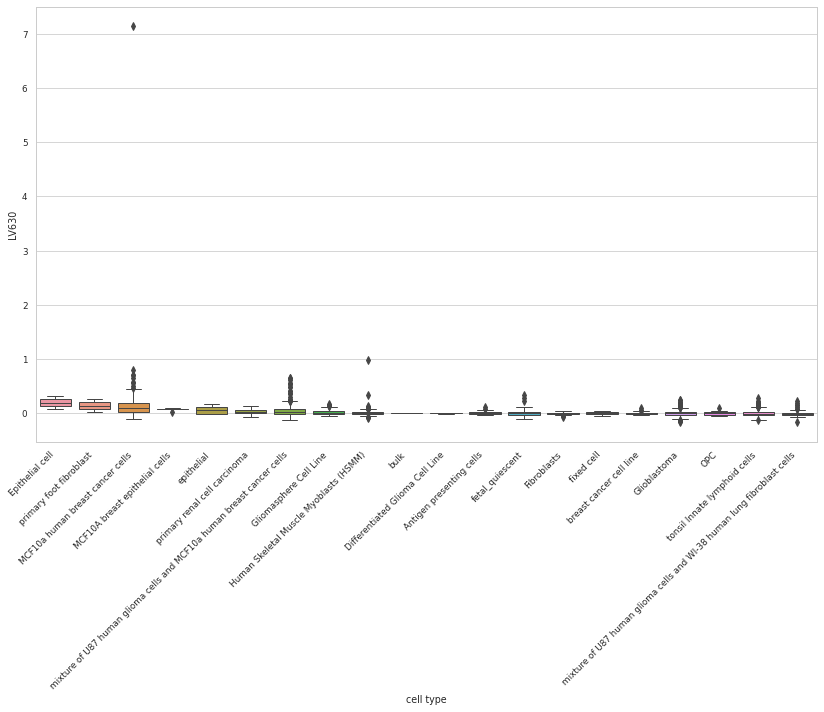

array(['SRP057196', 'SRP042218', 'SRP066834', 'SRP019994', 'SRP036821',
       'SRP017575', 'SRP028554', 'SRP015668'], dtype=object)

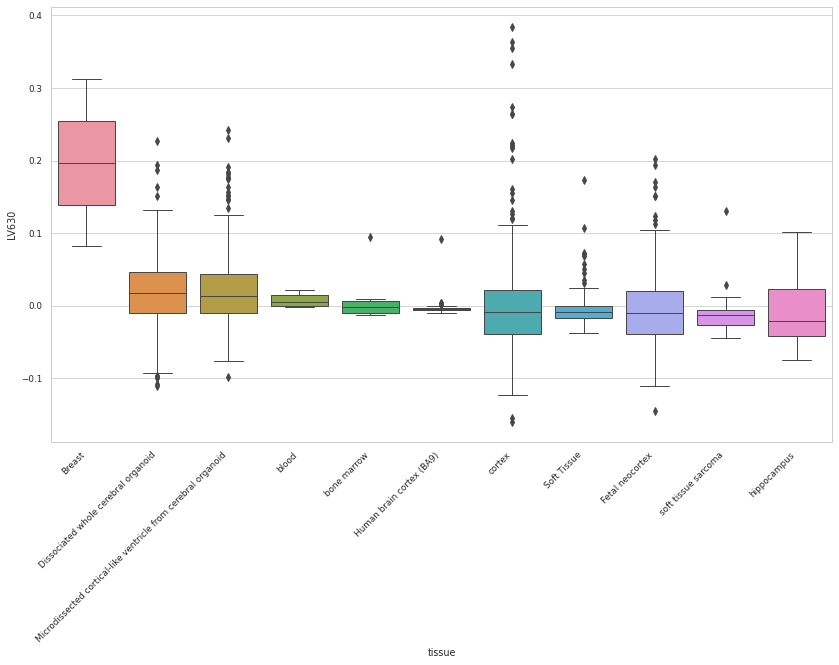

array(['SRP058120'], dtype=object)

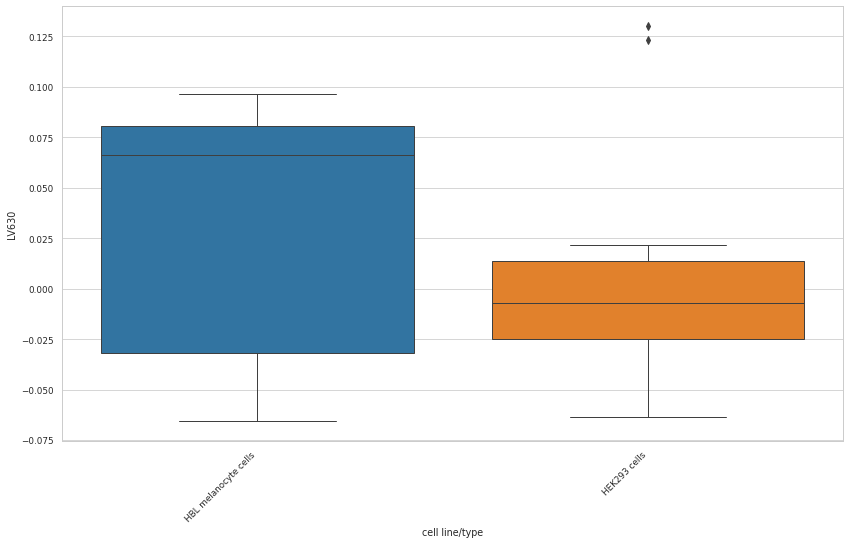

array(['SRP036821'], dtype=object)

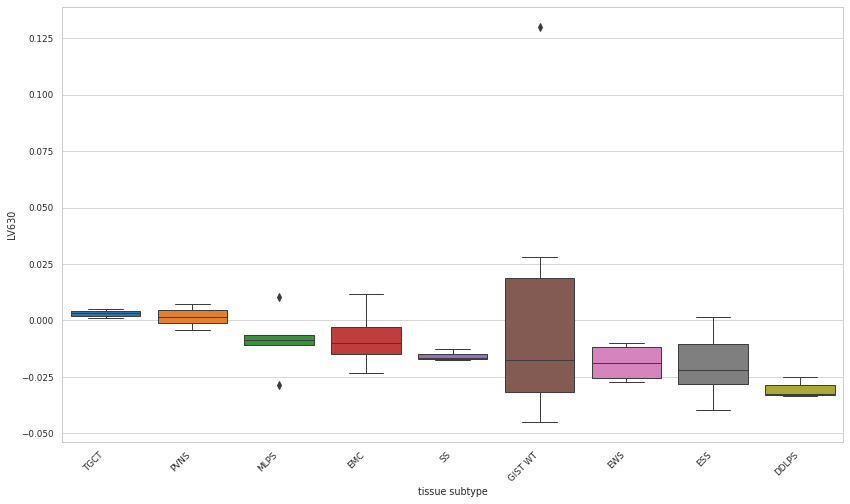

pathway LV index       AUC  \
1739                     KEGG_OXIDATIVE_PHOSPHORYLATION      750  0.714140   
1741                                      KEGG_RIBOSOME      750  0.888351   
1742  REACTOME_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TR...      750  0.627497   

           p-value           FDR  
1739  9.944383e-05  1.094389e-03  
1741  7.908484e-10  2.624400e-08  
1742  1.016375e-02  4.797201e-02

SRP058840, SRP033135, SRP011185, SRP017933, SRP057852, SRP009266, SRP033369, SRP014428, SRP055569, SRP034712, SRP014867, SRP057745, SRP018838, SRP018525, SRP065202, SRP059775, SRP042161, SRP052057, SRP011924, SRP028301, SRP012461, SRP062025, SRP044206, SRP026315, SRP007359, SRP055810, SRP014739, SRP056000, SRP062177, SRP037735, SRP030617, SRP056049, SRP068523, SRP041788, SRP045898, SRP003227, SRP009067, SRP063840, SRP035391, SRP058841, SRP009862, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (39 != 41)
  warnings.warn(


''

I9_K_CARDIAC-Death_due_to_cardiac_causes                                                   4.009518
20079_2-Dayofweek_questionnaire_completion_requested_Tuesday                               3.610226
41248_6000-Destinations_on_discharge_from_hospital_recoded_Transfer_within_NHS_provider    3.536253
20111_101-Illnesses_of_siblings_None_of_the_above_group_2                                  3.266077
100024_raw-Calcium                                                                         3.224789
41219_2-Anaesthetics_administered_during_delivery_Epidural_or_caudal_anaesthetic           3.165126
H7_MACULADEGEN-Degeneration_of_macula_and_posterior_pole                                   3.125974
20003_1140925800-Treatmentmedication_code_movicol_oral_powder                              3.010074
6157_4-Why_stopped_smoking_Financial_reasons                                               2.932118
20084_473-Vitamin_andor_mineral_supplement_use_Glucosaminechondroitin_                     2.832539


''

gene_name     LV750 gene_band
0     RPL34  5.130341      4q25
1    RPS27L  4.535644   15q22.2
2     ATP5J  4.347449   21q21.3
3    RPS4Y1  4.213055       NaN
4    RPL35A  3.954465      3q29
5    NDUFB1  3.931084  14q32.12
6     RPL39  3.148644       NaN
7     RPL31  3.148030    2q11.2
8      LSM5  3.133068    7p14.3
9      LSM3  3.130659    3p25.1

tissue            0.016377
cell type         0.010923
cell phenotype    0.007461
dtype: float64

array(['SRP017933', 'SRP014428', 'SRP011924', 'SRP062025', 'SRP007359',
       'SRP014739', 'SRP045898'], dtype=object)

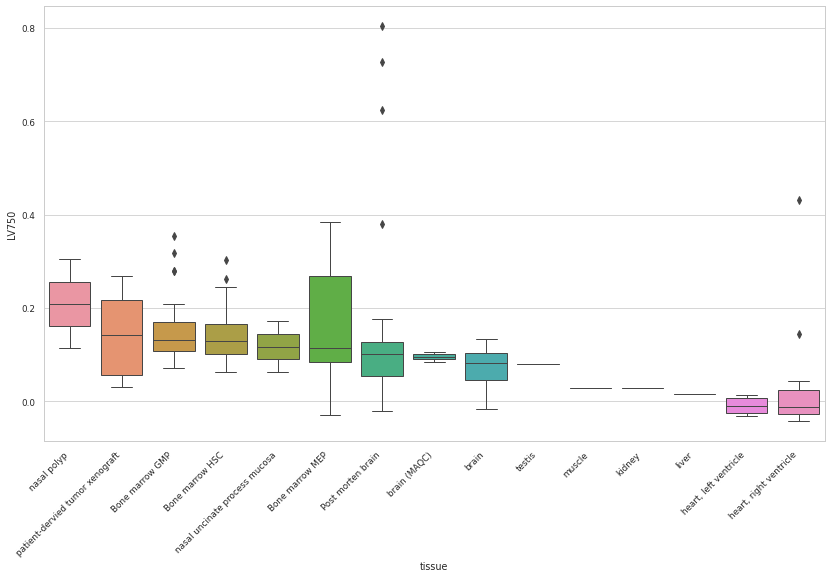

array(['SRP033135', 'SRP057852', 'SRP014428', 'SRP055569', 'SRP018525',
       'SRP065202', 'SRP042161', 'SRP012461', 'SRP044206', 'SRP026315',
       'SRP056000', 'SRP062177', 'SRP037735', 'SRP068523', 'SRP003227',
       'SRP009067', 'SRP063840'], dtype=object)

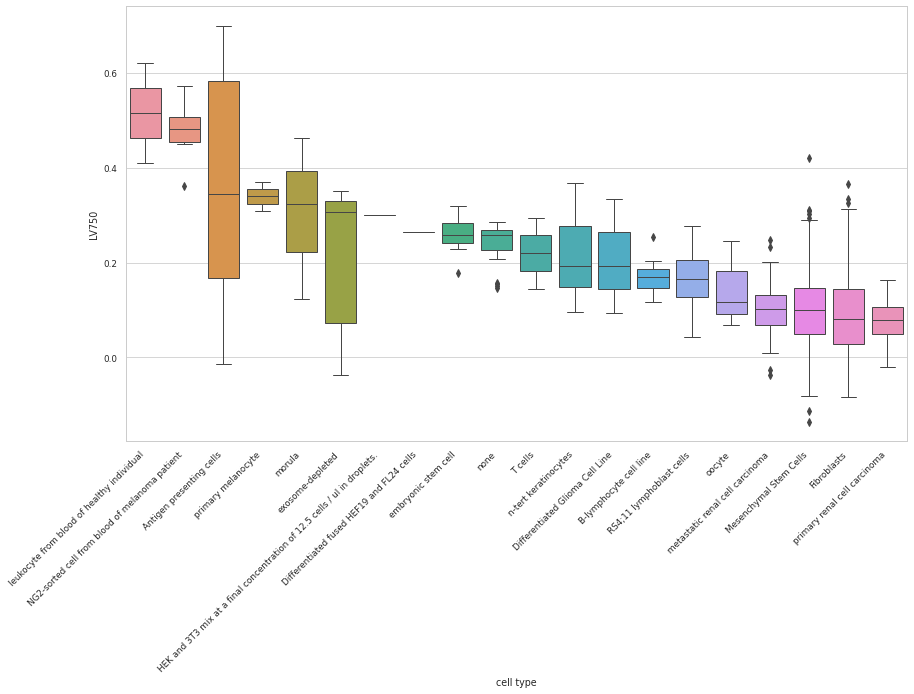

array(['SRP062025'], dtype=object)

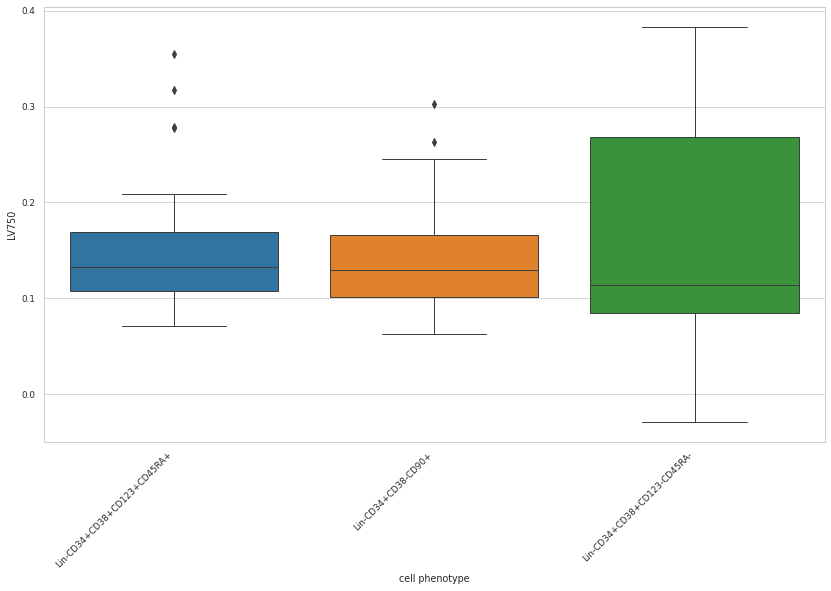

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP042161, SRP030617, SRP055569, SRP057196, SRP060416, SRP066834, SRP014428, SRP033135, SRP003901, SRP009862, SRP064464, SRP014739, SRP036769, SRP058667, SRP007947, SRP050499, SRP064259, SRP063840, SRP029262, SRP059379, SRP018719, SRP026052, SRP014670, SRP067701, SRP060355, SRP042218, SRP059035, SRP055153, SRP004637, SRP017777, SRP032775, SRP041094, SRP067214, SRP018242, SRP057205, SRP058773, SRP031507, SRP026297, SRP013363, SRP032833, SRP028554, SRP050992, SRP059039, SRP014213, SRP057118, SRP043960, SRP011895, SRP001758, SRP050223, SRP033239, SRP044925, SRP041538, SRP006474, SRP056637, SRP017138, SRP013450, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (55 != 56)
  warnings.warn(


''

20003_1141157132-Treatmentmedication_code_singulair_10mg_tablet                                       3.947752
headache disorder AND headache                                                                        3.642479
6072_1-OCT_measured_left_Measurable                                                                   3.341912
C_SECONDARY_RESPIRATORY_DIGESTIVE-Secondary_malignant_neoplasm_of_respiratory_and_digestive_organs    3.341743
22617_1233-Job_SOC_coding_Hairdressing_and_beauty_salon_managers_and_proprietors                      3.327134
20089_465-Type_of_meals_eaten_Home_cooked_meals                                                       3.307449
30010_raw-Red_blood_cell_erythrocyte_count                                                            3.290009
30040_raw-Mean_corpuscular_volume                                                                     3.250425
22630_9-Day_shifts_worked_This_type_of_shift_pattern_was_not_worked_during_job                        3.201018
3

''

gene_name      LV99 gene_band
0    ZNF473  8.204005  19q13.33
1     FBXO6  8.141920   1p36.22
2     EGLN1  7.568413    1q42.2
3    NDUFS1  6.996593    2q33.3
4      SYN3  6.827219   22q12.3
5    PFKFB2  6.731225    1q32.1
6    UNC13B  6.661573    9p13.3
7    EXOSC2  6.562337   9q34.12
8    ANP32A  4.707914     15q23
9     PSMC4  1.723096   19q13.2

cell type         0.053824
tissue subtype    0.001225
tissue            0.000669
tissue type       0.000468
dtype: float64

array(['SRP042161', 'SRP055569', 'SRP057196', 'SRP060416', 'SRP014428',
       'SRP033135', 'SRP007947', 'SRP064259', 'SRP063840', 'SRP059379',
       'SRP014670', 'SRP067701', 'SRP042218', 'SRP059035', 'SRP055153',
       'SRP041094', 'SRP031507', 'SRP026297', 'SRP050992', 'SRP014213',
       'SRP044925', 'SRP056637', 'SRP013450'], dtype=object)

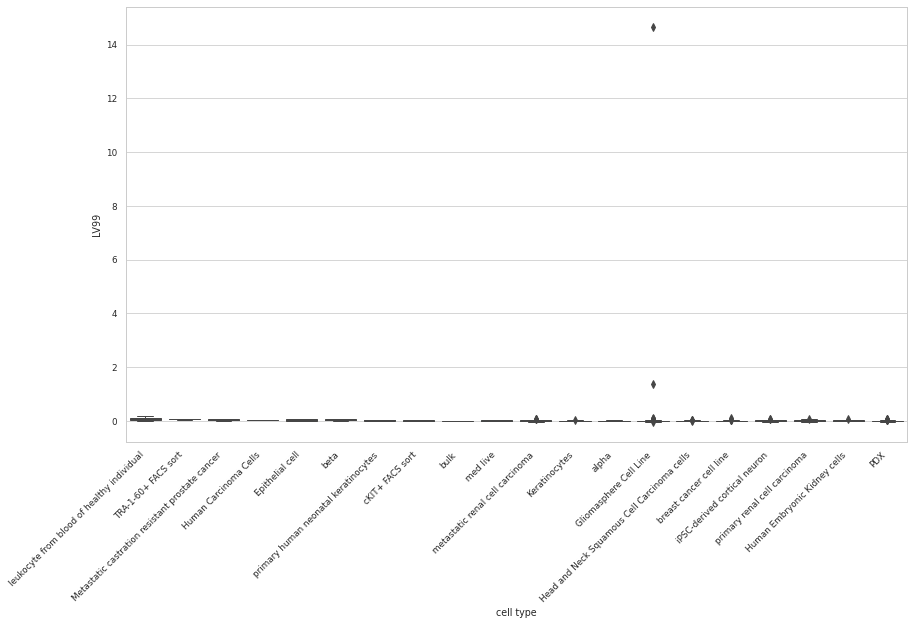

array(['SRP058667'], dtype=object)

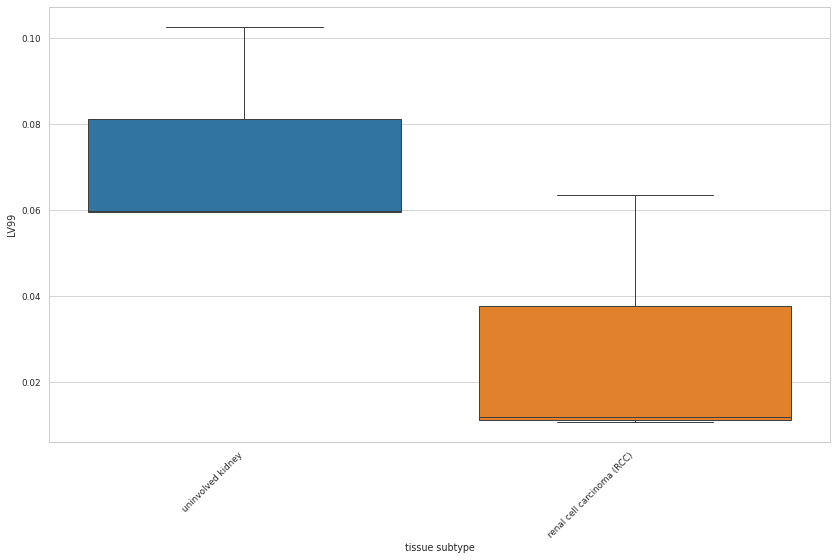

array(['SRP057196', 'SRP066834', 'SRP014428', 'SRP003901', 'SRP014739',
       'SRP036769', 'SRP029262', 'SRP014670', 'SRP060355', 'SRP042218',
       'SRP004637', 'SRP017777', 'SRP032775', 'SRP028554', 'SRP059039',
       'SRP057118', 'SRP050223', 'SRP033239', 'SRP041538'], dtype=object)

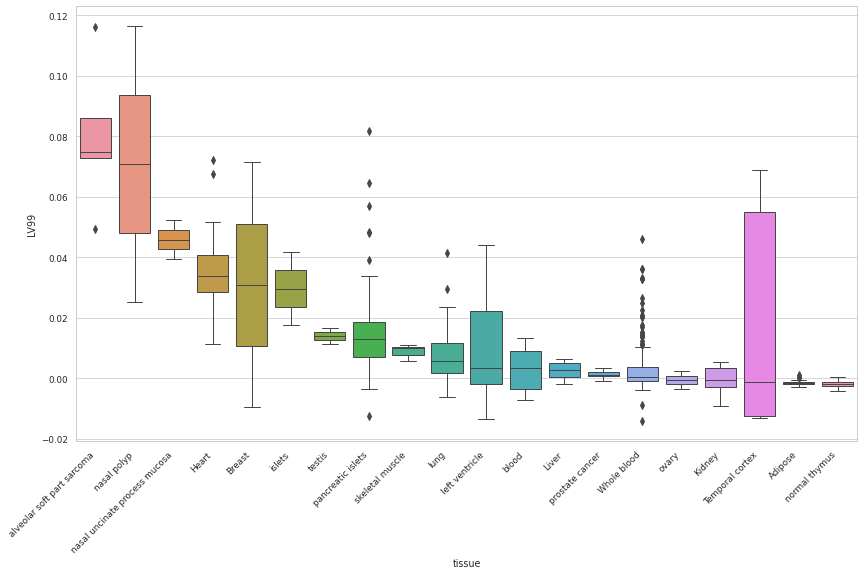

array(['SRP058667', 'SRP032833'], dtype=object)

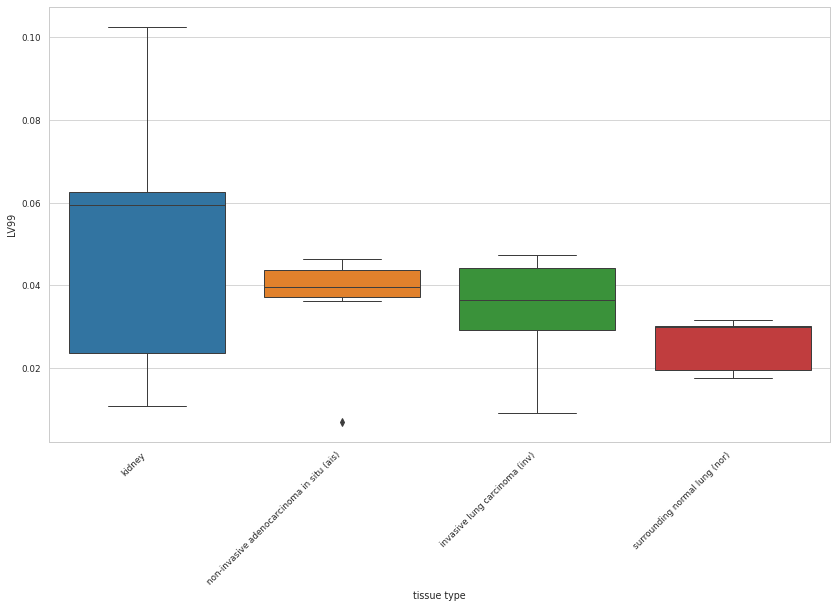

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP042161, SRP057196, SRP060416, SRP050499, SRP033135, SRP066834, SRP015013, SRP055569, SRP009862, SRP049479, SRP018853, SRP059379, SRP064464, SRP058773, SRP042218, SRP055810, SRP047192, SRP050992, SRP005279, SRP012461, SRP002326, SRP021130, SRP036848, SRP063840, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (23 != 24)
  warnings.warn(


''

6139_1-Gas_or_solidfuel_cookingheating_A_gas_hob_or_gas_cooker                                                     3.494606
767_raw-Length_of_working_week_for_main_job                                                                        3.492278
20544_14-Mental_health_problems_ever_diagnosed_by_a_professional_Autism_Aspergers_or_autistic_spectrum_disorder    3.173367
22617_3411-Job_SOC_coding_Artists                                                                                  3.106903
22641_raw-Period_spent_working_mix_of_day_and_night_shifts                                                         3.050603
2644-Light_smokers_at_least_100_smokes_in_lifetime                                                                 3.046080
ureterolithiasis                                                                                                   2.982220
20409-Frequency_of_feeling_guilt_or_remorse_after_drinking_alcohol_in_last_year                                    2.961444
22601_23

''

gene_name     LV676 gene_band
0    ZNF544  4.184673  19q13.43
1     GRIP2  2.970274    3p25.1
2     PLCE1  2.851137  10q23.33
3   BCL2L14  2.382678   12p13.2
4      TLE1  2.325787   9q21.32
5     DCTN4  2.004100    5q33.1
6   ST3GAL6  1.958694    3q12.1
7    POLR2C  1.764500     16q21
8     NCALD  1.567713    8q22.3
9     FBXO3  1.522939     11p13

cell type    0.016844
tissue       0.007705
dtype: float64

array(['SRP042161', 'SRP057196', 'SRP060416', 'SRP033135', 'SRP055569',
       'SRP059379', 'SRP042218', 'SRP047192', 'SRP050992', 'SRP005279',
       'SRP012461', 'SRP063840'], dtype=object)

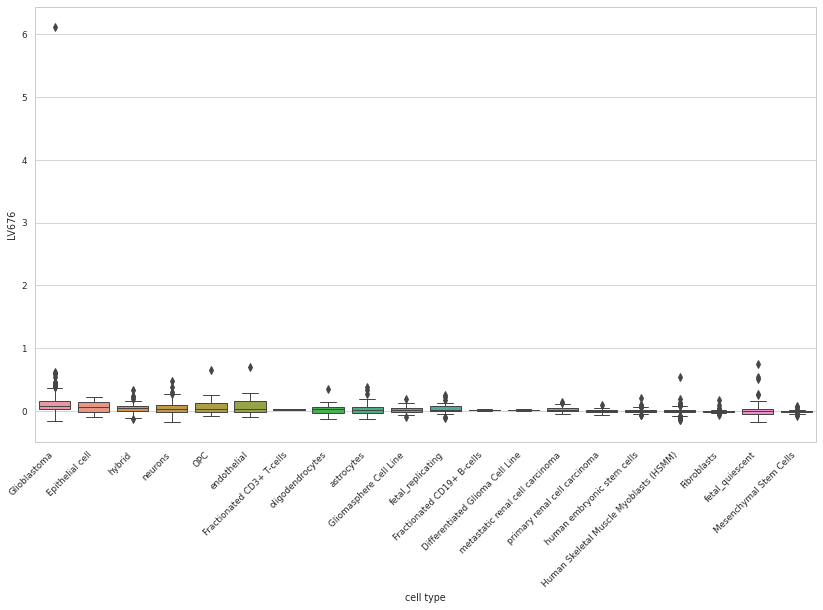

array(['SRP057196', 'SRP066834', 'SRP042218', 'SRP047192', 'SRP005279',
       'SRP002326', 'SRP021130', 'SRP036848'], dtype=object)

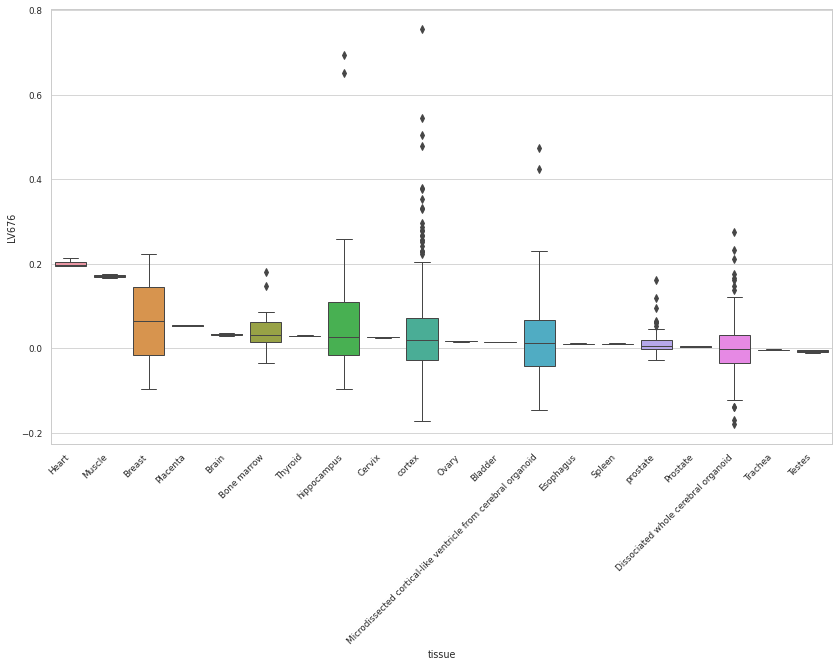

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP055569, SRP066834, SRP007338, SRP057196, SRP042161, SRP033135, SRP059379, SRP060416, SRP058773, SRP050499, SRP045659, SRP002326, SRP057205, SRP059732, SRP007508, SRP009862, SRP033248, SRP063840, SRP011422, SRP009266, SRP012461, SRP047519, SRP045869, SRP049409, SRP064464, SRP008218, SRP034953, SRP042218, SRP057244, SRP007359, SRP015013, SRP055153, SRP050992, SRP010279, SRP049500, SRP007947, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (34 != 36)
  warnings.warn(


''

celiac disease                                                                                                          4.347747
22601_23293031-Job_coding_other_researchers_including_in_broadcasting_journalism_photography_printing_and_publishing    4.341198
20490-Sexually_molested_as_a_child                                                                                      3.851316
100005_raw-Carbohydrate                                                                                                 3.649675
20084_484-Vitamin_andor_mineral_supplement_use_Selenium_                                                                3.585173
psoriasis                                                                                                               3.342155
4803_0-Tinnitus_No_never                                                                                                3.298614
alzheimer's disease                                                                              

''

gene_name     LV775 gene_band
0    POLR3A  6.700381   10q22.3
1    MRPL53  4.833926    2p13.1
2    GRPEL1  3.220496    4p16.1
3      PKIG  3.183743  20q13.12
4  ATP6V0E1  2.414161    5q35.1
5      TNIK  2.325139   3q26.31
6    NDUFS3  2.321125   11p11.2
7      IER3  2.168138   6p21.33
8       ELL  1.966898  19p13.11
9     IMPA2  1.755961  18p11.21

cell type    0.018859
tissue       0.002026
dtype: float64

array(['SRP055569', 'SRP057196', 'SRP042161', 'SRP033135', 'SRP059379',
       'SRP060416', 'SRP007508', 'SRP063840', 'SRP012461', 'SRP047519',
       'SRP049409', 'SRP008218', 'SRP042218', 'SRP055153', 'SRP050992',
       'SRP049500', 'SRP007947'], dtype=object)

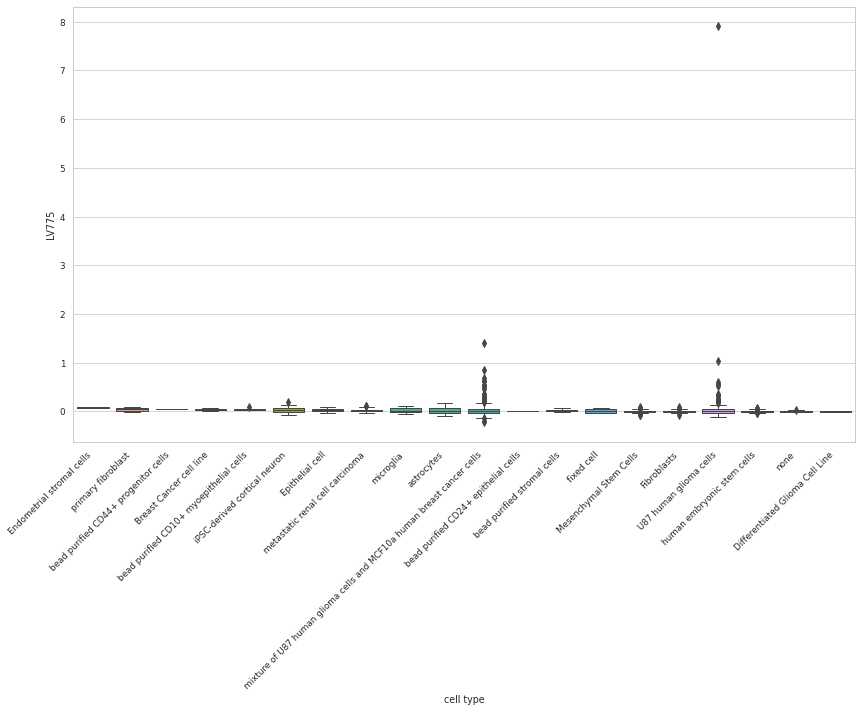

array(['SRP066834', 'SRP057196', 'SRP002326', 'SRP033248', 'SRP011422',
       'SRP047519', 'SRP045869', 'SRP008218', 'SRP034953', 'SRP042218',
       'SRP007359'], dtype=object)

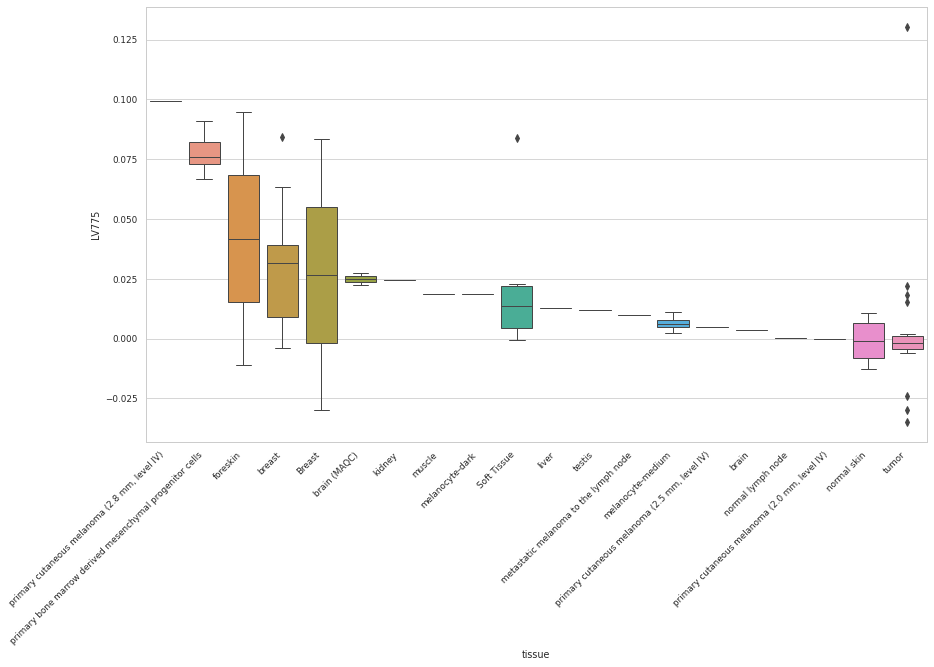

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP007338, SRP055569, SRP057196, SRP019994, SRP042161, SRP015013, SRP060355, SRP060416, SRP057205, SRP006575, SRP050499, SRP066834, SRP058773, SRP061380, SRP012546, SRP009266, SRP012461, SRP036821, SRP052740, SRP029880, SRP059775, SRP063840, SRP051102, SRP017959, SRP067469, SRP033135, SRP042620, SRP040442, SRP018359, SRP055153, SRP004837, SRP017575, SRP015678, SRP002628, SRP050534, SRP007461, SRP006676, SRP025982, SRP008218, SRP015640, SRP045659, SRP017777, SRP027383, SRP045611, SRP055512, SRP007412, SRP039591, SRP042579, SRP014320, SRP058722, SRP064464, SRP030617, SRP039338, SRP011895, SRP036053, SRP040998, SRP041706, SRP041538, SRP006769, SRP005279, SRP018838, SRP041751, SRP029207, SRP001540, SRP014487, SRP063838, SRP013363, SRP012656, SRP056696, SRP063493, SRP023262, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (67 != 71)
  warnings.warn(


''

cartilage disease                                                      3.785091
coronary artery disease                                                3.540230
6157_1-Why_stopped_smoking_Illness_or_ill_health                       3.215757
1150_1-Usual_side_of_head_for_mobile_phone_use_Left                    2.941546
2070-Frequency_of_tenseness_restlessness_in_last_2_weeks               2.904418
20003_1140865580-Treatmentmedication_code_asacol_400mg_ec_tablet       2.846911
23124_raw-Arm_fat_mass_left                                            2.842143
23120_raw-Arm_fat_mass_right                                           2.816321
H8_HL_SEN_NAS-Sensorineural_hearing_loss                               2.805466
4501-Nonaccidental_death_in_close_genetic_family                       2.778470
23119_raw-Arm_fat_percentage_right                                     2.771941
mood swings                                                            2.757375
20003_1141172698-Treatmentmedication_cod

''

gene_name     LV131 gene_band
0   CTNNAL1  2.660586    9q31.3
1    TRIP10  2.610527   19p13.3
2     MYL6B  2.546644   12q13.2
3  PPP1R14A  2.436438   19q13.2
4     RAP1A  2.398680    1p13.2
5      VASP  2.310598  19q13.32
6      CD81  2.280926   11p15.5
7     RNF25  2.124285      2q35
8      PFN4  2.095278    2p23.3
9      PKIG  2.090126  20q13.12

cell type         0.002721
tissue            0.002471
tissue subtype    0.001851
tissue type       0.001311
dtype: float64

array(['SRP055569', 'SRP057196', 'SRP042161', 'SRP060416', 'SRP006575',
       'SRP061380', 'SRP012461', 'SRP052740', 'SRP063840', 'SRP051102',
       'SRP033135', 'SRP018359', 'SRP055153', 'SRP004837', 'SRP050534',
       'SRP006676', 'SRP008218', 'SRP015640', 'SRP045611', 'SRP055512',
       'SRP042579', 'SRP005279', 'SRP041751', 'SRP014487'], dtype=object)

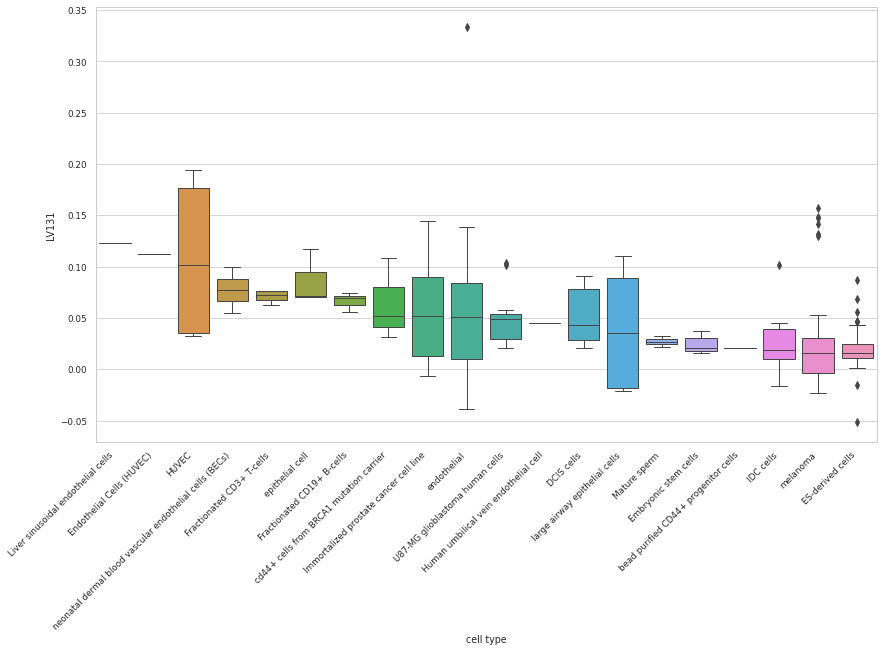

array(['SRP057196', 'SRP019994', 'SRP060355', 'SRP006575', 'SRP066834',
       'SRP012546', 'SRP036821', 'SRP029880', 'SRP042620', 'SRP040442',
       'SRP004837', 'SRP017575', 'SRP015678', 'SRP002628', 'SRP050534',
       'SRP008218', 'SRP017777', 'SRP039591', 'SRP042579', 'SRP058722',
       'SRP039338', 'SRP036053', 'SRP041706', 'SRP041538', 'SRP006769',
       'SRP005279', 'SRP029207', 'SRP014487', 'SRP063838', 'SRP056696',
       'SRP023262'], dtype=object)

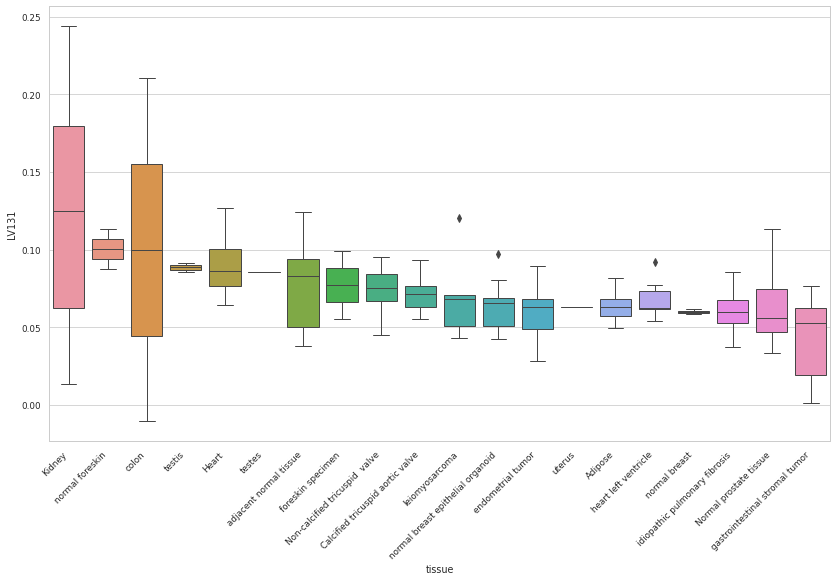

array(['SRP036821'], dtype=object)

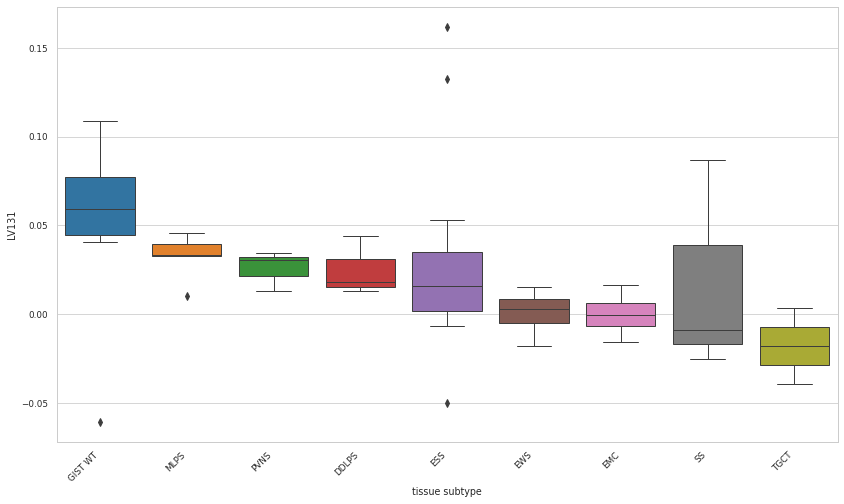

array(['SRP012656'], dtype=object)

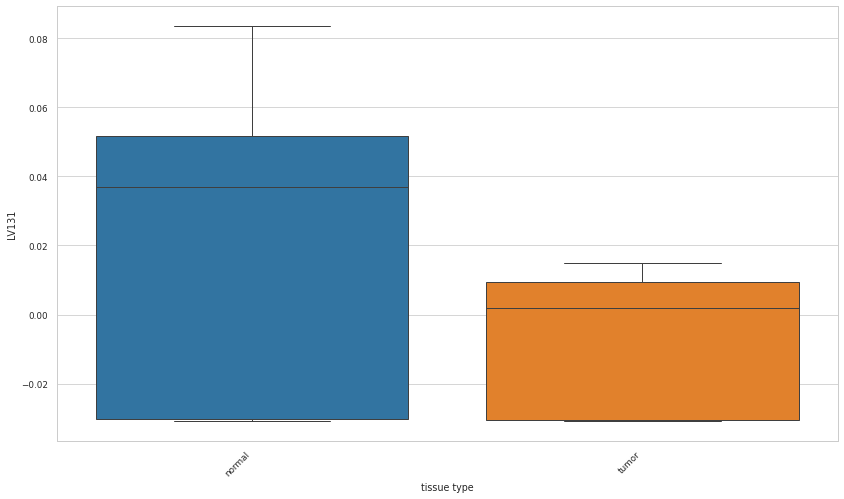

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP055569, SRP060416, SRP057196, SRP042161, SRP066834, SRP009247, SRP050499, SRP033135, SRP009862, SRP042218, SRP045659, SRP064464, SRP049238, SRP009266, SRP058773, SRP012461, SRP035391, SRP014428, SRP059379, SRP013935, SRP049500, SRP006575, SRP023262, SRP039397, SRP030617, SRP028902, SRP011578, SRP007338, SRP015976, SRP067701, SRP014320, SRP007947, SRP018853, SRP059775, SRP036821, SRP019994, SRP017575, SRP063840, SRP028301, SRP035599, SRP012098, SRP059035, SRP062177, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (40 != 43)
  warnings.warn(


''

XII_SKIN_SUBCUTAN-Diseases_of_the_skin_and_subcutaneous_tissue                      4.120008
22617_5249-Job_SOC_coding_Electricalelectronics_engineers_nec                       4.006514
H7_GLAUCPRIMOPEN-Primary_openangle_glaucoma                                         3.801056
20544_12-Mental_health_problems_ever_diagnosed_by_a_professional_Bulimia_nervosa    3.652685
1299-Salad_raw_vegetable_intake                                                     3.371966
2247_0-Hearing_difficultyproblems_No                                                3.349707
20486-Contemplated_selfharm_in_past_year                                            3.343603
fall                                                                                3.291460
irritability measurement                                                            3.285635
6154_4-Medication_for_pain_relief_constipation_heartburn_Ranitidine_eg_Zantac       3.281524
20003_1141150944-Treatmentmedication_code_nasonex_005_aqueous_nasal_sp

''

gene_name     LV199 gene_band
0     UBE3B  6.701284  12q24.11
1      PGK1  5.116626       NaN
2     NUP62  4.679677  19q13.33
3    NDUFS6  3.580393   5p15.33
4     PSMB7  2.861780    9q33.3
5      GAB1  2.327888   4q31.21
6     MDFIC  2.025527    7q31.1
7     BLVRB  1.946115   19q13.2
8      SCG5  1.857052   15q13.3
9     POLD4  1.537807   11q13.2

cell type         0.020115
tissue            0.001980
tissue subtype    0.000660
dtype: float64

array(['SRP055569', 'SRP060416', 'SRP057196', 'SRP042161', 'SRP033135',
       'SRP042218', 'SRP049238', 'SRP012461', 'SRP014428', 'SRP059379',
       'SRP013935', 'SRP049500', 'SRP006575', 'SRP028902', 'SRP011578',
       'SRP015976', 'SRP067701', 'SRP007947', 'SRP063840', 'SRP035599',
       'SRP059035', 'SRP062177'], dtype=object)

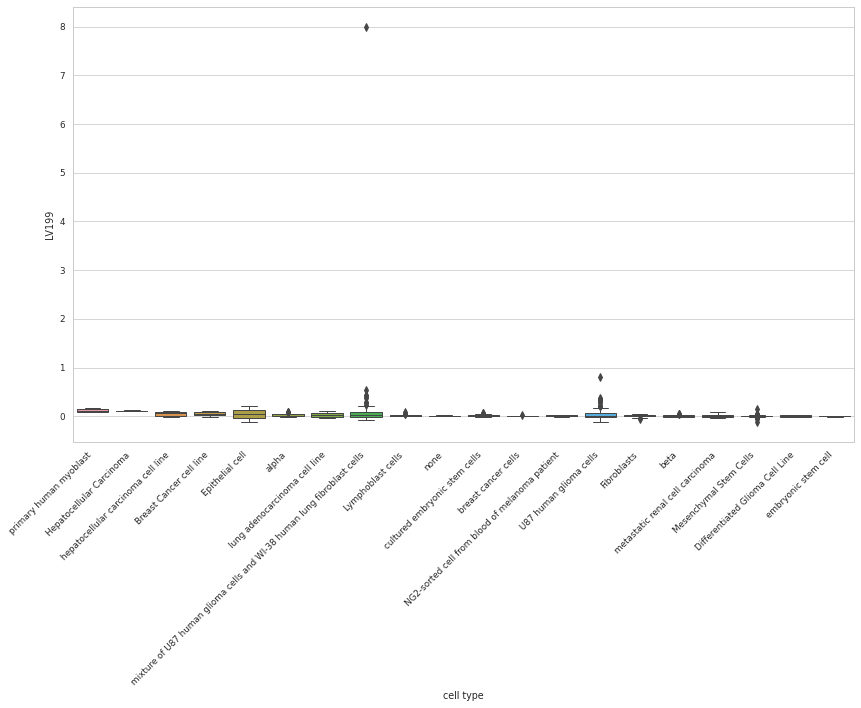

array(['SRP057196', 'SRP066834', 'SRP042218', 'SRP014428', 'SRP006575',
       'SRP023262', 'SRP036821', 'SRP019994', 'SRP017575'], dtype=object)

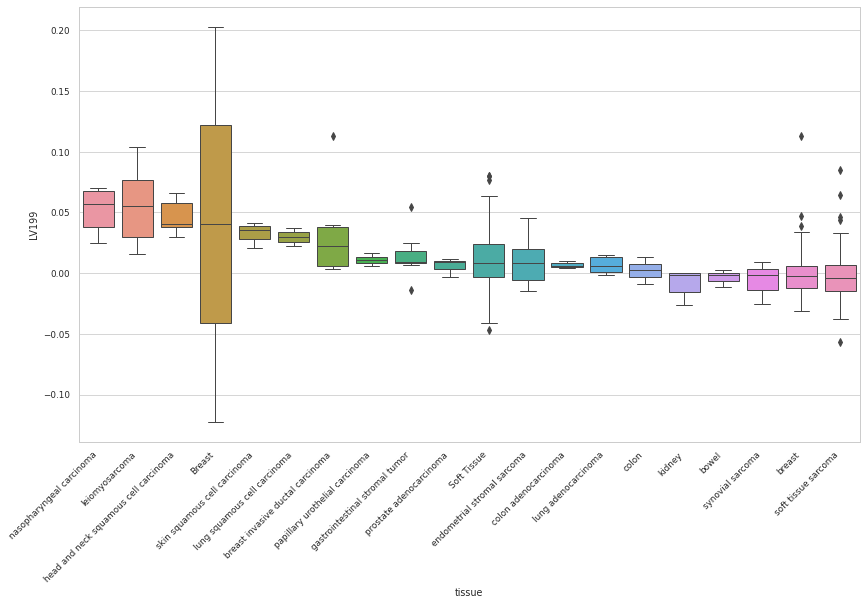

array(['SRP036821'], dtype=object)

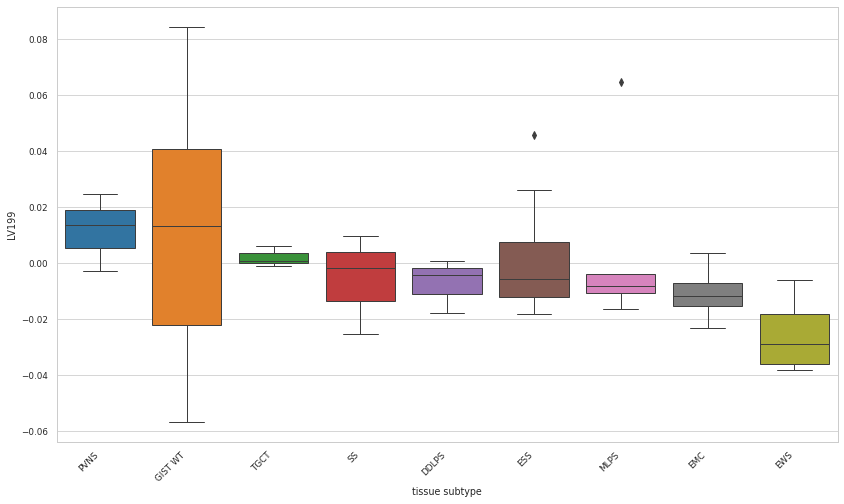

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP032775, SRP050333, SRP059172, SRP022133, SRP058654, SRP035312, SRP034711, SRP050272, SRP056295, SRP049820, SRP064316, SRP055569, SRP066834, SRP029990, SRP063493, SRP045500, SRP057196, SRP060416, SRP033135, SRP057500, SRP050000, SRP056840, SRP046233, SRP050493, SRP058773, SRP053296, SRP033266, SRP063477, SRP057586, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (28 != 29)
  warnings.warn(


''

30280_raw-Immature_reticulocyte_fraction                   7.515574
30260_raw-Mean_reticulocyte_volume                         5.866231
30100_raw-Mean_platelet_thrombocyte_volume                 5.404441
30110_raw-Platelet_distribution_width                      5.299849
22608_1-Workplace_very_hot_Sometimes                       3.528284
30070_raw-Red_blood_cell_erythrocyte_distribution_width    3.474590
gastric ulcer                                              3.439698
30270_raw-Mean_sphered_cell_volume                         3.391743
30040_raw-Mean_corpuscular_volume                          3.360914
K11_GASTRODUOULC-Gastroduodenal_ulcer                      3.357549
20003_1140884412-Treatmentmedication_code_sumatriptan      3.030066
30230-Nucleated_red_blood_cell_percentage                  3.017404
30170-Nucleated_red_blood_cell_count                       2.953802
H7_EPIPHORA-Epiphora                                       2.940430
6138_2-Qualifications_A_levelsAS_levels_or_equiv

''

gene_name     LV896 gene_band
0    BNIP3L  5.673895    8p21.2
1     MKRN1  5.576088      7q34
2    TRIM58  5.303148      1q44
3     EPB41  5.162404    1p35.3
4      YOD1  4.978820    1q32.1
5     MBNL3  4.924657       NaN
6     FBXO7  4.635905   22q12.3
7      SNCA  4.381529    4q22.1
8     RIOK3  3.913277   18q11.2
9   ADIPOR1  3.900143    1q32.1

tissue       0.034663
cell type    0.003892
dtype: float64

array(['SRP032775', 'SRP059172', 'SRP022133', 'SRP058654', 'SRP035312',
       'SRP056295', 'SRP049820', 'SRP064316', 'SRP066834', 'SRP029990',
       'SRP057196', 'SRP057500', 'SRP033266', 'SRP063477'], dtype=object)

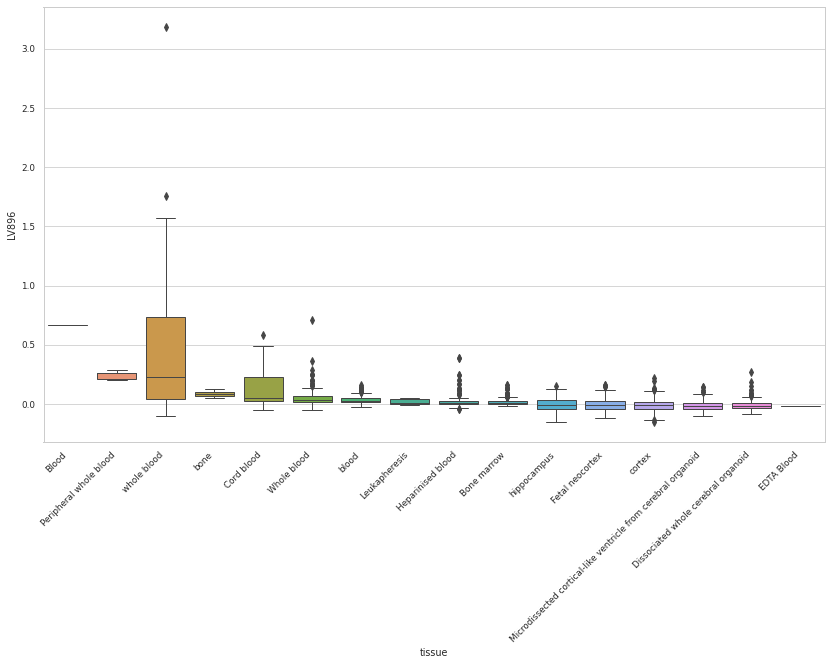

array(['SRP050333', 'SRP058654', 'SRP035312', 'SRP056295', 'SRP055569',
       'SRP057196', 'SRP060416', 'SRP033135', 'SRP057500', 'SRP046233',
       'SRP033266'], dtype=object)

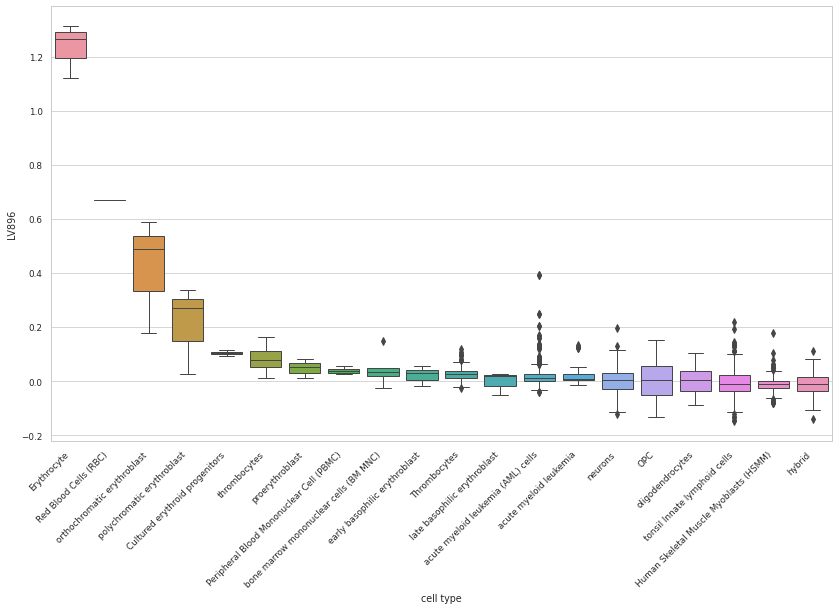

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP055569, SRP057196, SRP066834, SRP015013, SRP050892, SRP060416, SRP050499, SRP042161, SRP058773, SRP009862, SRP033135, SRP059379, SRP066729, SRP002184, SRP006575, SRP033276, SRP017411, SRP015449, SRP059775, SRP007947, SRP063840, SRP065202, SRP024268, SRP055153, SRP019994, SRP018838, SRP050992, SRP032165, SRP040998, SRP010166, SRP059170, SRP013402, SRP062177, SRP044925, SRP018853, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (33 != 35)
  warnings.warn(


''

2877_1-Type_of_tobacco_previously_smoked_Manufactured_cigarettes                           3.765250
3581_raw-Age_at_menopause_last_menstrual_period                                            3.667146
20003_1140879464-Treatmentmedication_code_loperamide                                       3.457969
adenomatous colon polyp                                                                    3.278068
M13_SOFTOVERUSE-Soft_tissue_disorders_related_to_use_overuse_and_pressure                  3.254143
20003_1140909788-Treatmentmedication_code_sodium_cromoglicate                              3.216120
uterine prolapse                                                                           3.166054
22617_3567-Job_SOC_coding_Occupational_hygienists_and_safety_officers_health_and_safety    3.136557
40001_C159-Underlying_primary_cause_of_death_ICD10_C159_Oesophagus_unspecified             3.060515
burn                                                                                       3.060162


''

gene_name     LV783 gene_band
0   RAP1GDS1  5.584923      4q23
1      RRAGC  5.506768    1p34.3
2      MGRN1  3.009022   16p13.3
3      G6PC3  2.746351  17q21.31
4     S100A2  2.377933    1q21.3
5     MRPS30  1.925284      5p12
6      AZIN1  1.590938    8q22.3
7     TROVE2  1.471956    1q31.2
8      VPS28  1.451518    8q24.3
9  HNRNPA2B1  1.427294    7p15.2

cell type    0.015234
tissue       0.005101
dtype: float64

array(['SRP055569', 'SRP057196', 'SRP060416', 'SRP042161', 'SRP033135',
       'SRP059379', 'SRP002184', 'SRP006575', 'SRP017411', 'SRP007947',
       'SRP063840', 'SRP065202', 'SRP055153', 'SRP050992', 'SRP010166',
       'SRP059170', 'SRP013402', 'SRP062177', 'SRP044925'], dtype=object)

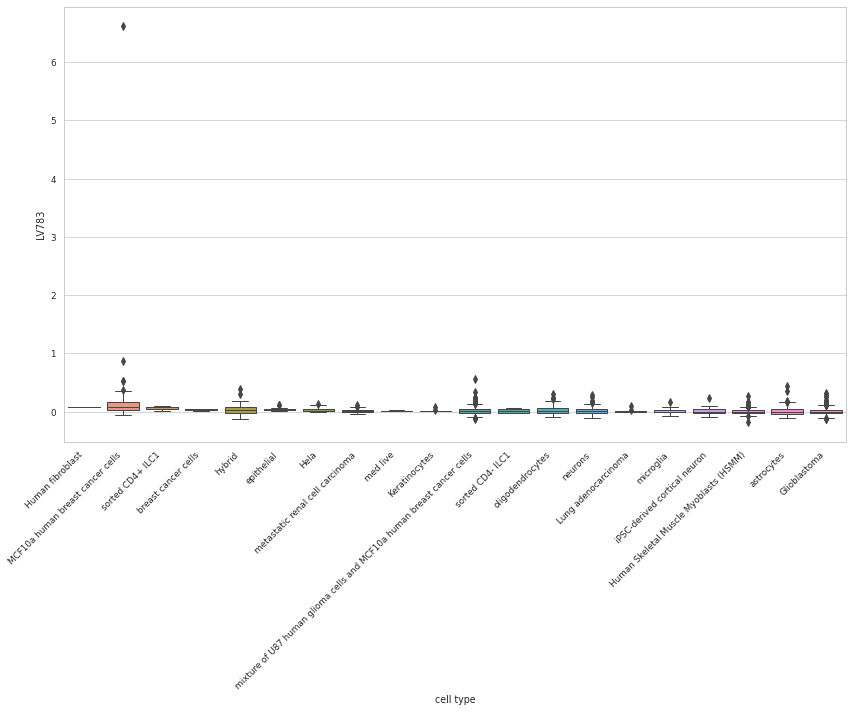

array(['SRP057196', 'SRP066834', 'SRP066729', 'SRP006575', 'SRP033276',
       'SRP024268', 'SRP019994', 'SRP032165', 'SRP059170'], dtype=object)

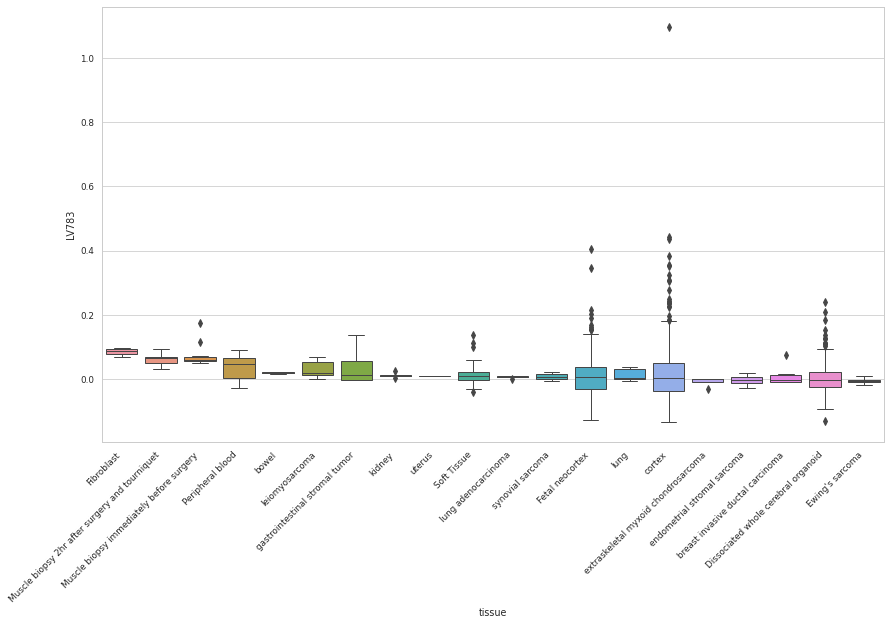

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP015013, SRP033135, SRP057196, SRP055569, SRP042161, SRP066834, SRP060416, SRP011185, SRP055153, SRP063840, SRP050499, SRP058773, SRP007947, SRP018718, SRP059775, SRP017777, SRP018717, SRP028180, SRP063493, SRP022892, SRP064259, SRP003901, SRP012461, SRP009247, SRP028291, SRP019994, SRP045659, SRP029656, SRP036821, SRP002487, SRP033116, SRP018719, SRP007498, SRP057745, SRP059035, SRP009862, SRP009266, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (35 != 37)
  warnings.warn(


''

testicular carcinoma                                                                                             3.519796
20003_1141180392-Treatmentmedication_code_cefalexin                                                              3.408116
3064_raw-Peak_expiratory_flow_PEF                                                                                3.207517
20003_1140872694-Treatmentmedication_code_flucloxacillin                                                         3.207487
20089_461-Type_of_meals_eaten_Takeaway_meals                                                                     3.186465
20536_2-Weight_change_during_worst_episode_of_depression_Lost_weight                                             3.178692
20003_1141151288-Treatmentmedication_code_naramig_25mg_tablet                                                    3.160685
C_BREAST_3-Malignant_neoplasm_of_breast                                                                          3.144259
22601_35333259-Job_codin

''

gene_name     LV467 gene_band
0    SNRPD1  6.554490   18q11.2
1    ZNF528  5.807230  19q13.41
2      TAB2  5.519590    6q25.1
3      DHPS  3.692136  19p13.13
4    NDUFB7  3.540023  19p13.12
5    MRPL34  2.827193  19p13.11
6     LIN54  2.671333   4q21.22
7   ABHD14A  2.556434    3p21.2
8     DRAP1  1.828024   11q13.1
9     ECHS1  1.733909   10q26.3

tissue            0.003626
cell type         0.003372
tissue subtype    0.000485
dtype: float64

array(['SRP057196', 'SRP066834', 'SRP017777', 'SRP028180', 'SRP003901',
       'SRP019994', 'SRP036821'], dtype=object)

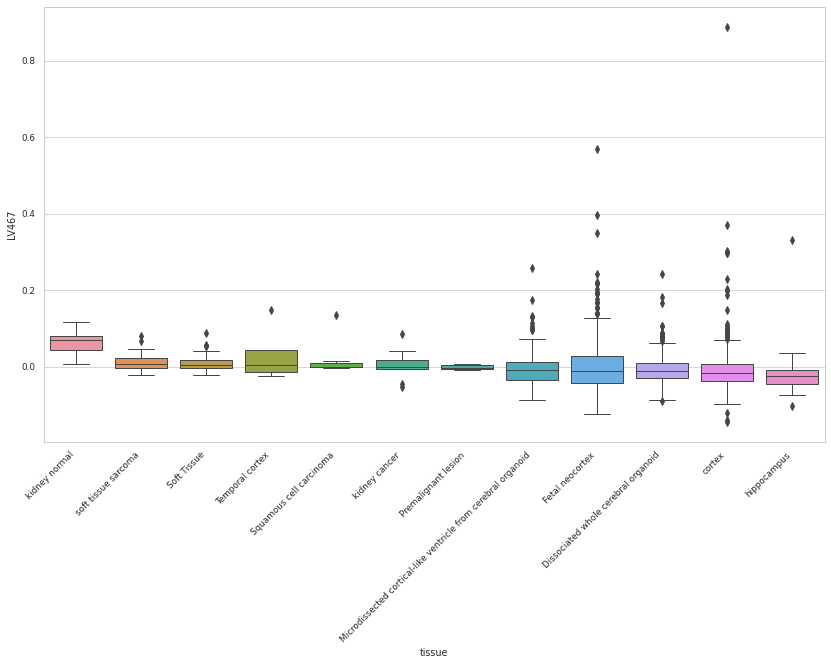

array(['SRP033135', 'SRP057196', 'SRP055569', 'SRP042161', 'SRP060416',
       'SRP055153', 'SRP063840', 'SRP007947', 'SRP028180', 'SRP064259',
       'SRP012461', 'SRP028291', 'SRP059035'], dtype=object)

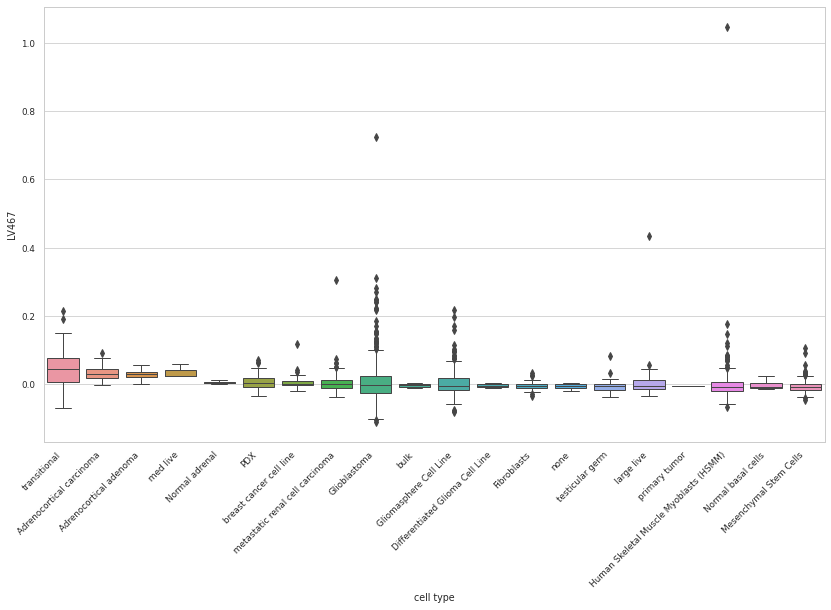

array(['SRP036821'], dtype=object)

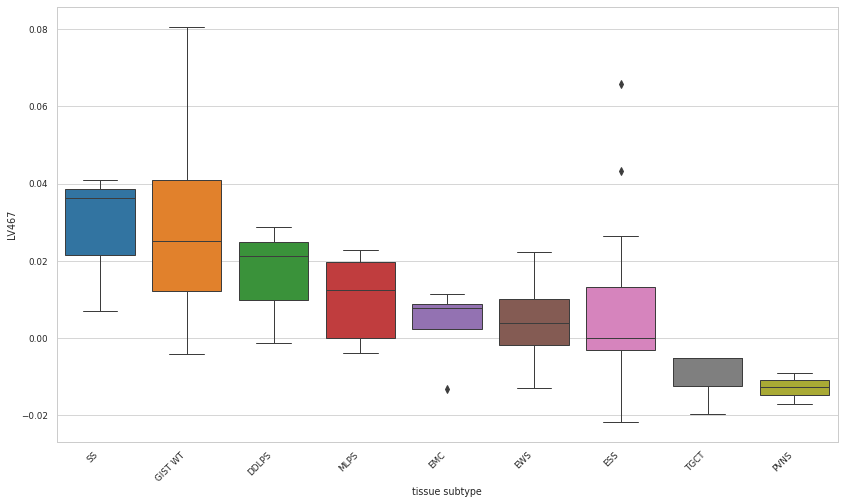

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP055569, SRP042161, SRP066834, SRP057196, SRP064259, SRP060416, SRP055153, SRP007338, SRP033135, SRP050499, SRP022892, SRP042218, SRP023111, SRP007569, SRP038969, SRP058773, SRP044917, SRP059775, SRP039361, SRP030617, SRP014591, SRP057205, SRP012463, SRP063840, SRP006769, SRP002326, SRP007412, SRP018838, SRP050992, SRP007359, SRP059035, SRP026052, SRP014487, SRP025982, SRP066729, SRP049769, SRP043078, SRP018853, SRP064464, SRP015668, 

''

age at first facial hair                                                                              4.477502
30280_raw-Immature_reticulocyte_fraction                                                              4.208788
pituitary gland adenoma                                                                               3.829151
female genital tract polyp                                                                            3.800165
50_raw-Standing_height                                                                                3.667505
6160_5-Leisuresocial_activities_Other_group_activity                                                  3.528909
reticulocyte count                                                                                    3.521214
22604_4-Work_hours_lumped_category_Over_40_hours                                                      3.455629
age at menarche                                                                                       3.377515
2

''

gene_name     LV498 gene_band
0  MAPKAPK3  7.201669    3p21.2
1     QRSL1  5.289618      6q21
2     LSM11  5.014043    5q33.3
3    STRADA  4.893949   17q23.3
4     SAR1B  3.468442    5q31.1
5     CSDE1  2.921329    1p13.2
6    SHISA5  2.681246   3p21.31
7     SETD7  2.132676    4q31.1
8    ATP8B3  2.051150   19p13.3
9     AP1B1  1.986678   22q12.2

cell type    0.023397
tissue       0.003202
dtype: float64

array(['SRP055569', 'SRP042161', 'SRP057196', 'SRP064259', 'SRP060416',
       'SRP055153', 'SRP033135', 'SRP042218', 'SRP007569', 'SRP044917',
       'SRP039361', 'SRP063840', 'SRP050992', 'SRP059035', 'SRP014487',
       'SRP049769', 'SRP043078'], dtype=object)

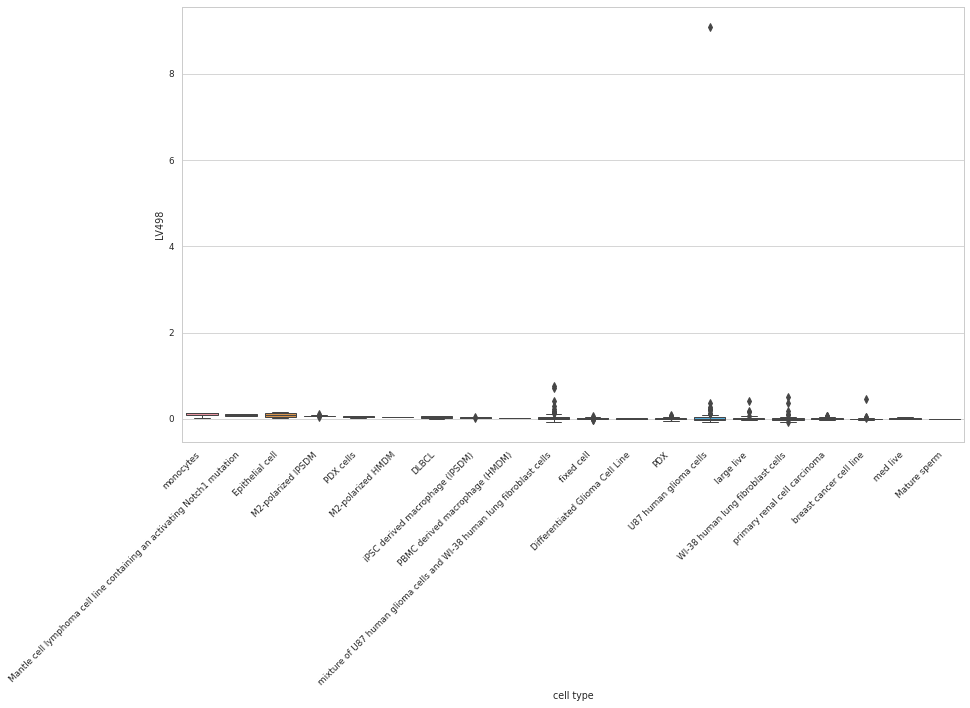

array(['SRP066834', 'SRP057196', 'SRP042218', 'SRP006769', 'SRP002326',
       'SRP007359', 'SRP014487', 'SRP066729', 'SRP015668'], dtype=object)

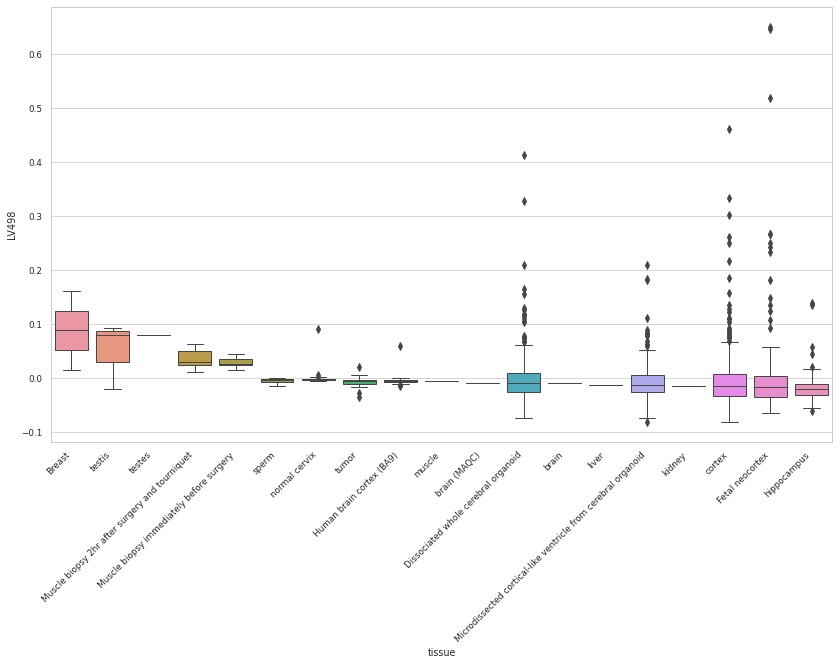

Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP006717, SRP055569, SRP060416, SRP024268, SRP065219, SRP066834, SRP056733, SRP058237, SRP026620, SRP002487, SRP048759, SRP012461, SRP066729, SRP057196, SRP042161, SRP033369, SRP031507, SRP059695, SRP045352, SRP007359, SRP058773, SRP009266, SRP058667, SRP068523, SRP045500, SRP063059, SRP050499, SRP059775, SRP033135, SRP017138, SRP056295, SRP055513, SRP051170, SRP014867, SRP005177, SRP058856, SRP038101, SRP006474, SRP057745, SRP018838, SRP056074, SRP063840, SRP023270, SRP057852, SRP026052, SRP028594, SRP055153, SRP013363, SRP057244, SRP018717, SRP059531, SRP018719, SRP018718, SRP026315, SRP018716, SRP045441, SRP018571, SRP007498, SRP040278, SRP022925, SRP028301, SRP050954, SRP064458, SRP056197, SRP045711, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (64 != 65)
  warnings.warn(


''

4100_raw-Ankle_spacing_width_left                                                                                 6.109098
4119_raw-Ankle_spacing_width_right                                                                                6.089153
3143_raw-Ankle_spacing_width                                                                                      5.651824
6153_2-Medication_for_cholesterol_blood_pressure_diabetes_or_take_exogenous_hormones_Blood_pressure_medication    5.011297
20003_1141194794-Treatmentmedication_code_bendroflumethiazide                                                     4.619194
3147_raw-Heel_quantitative_ultrasound_index_QUI_direct_entry                                                      4.414986
78_raw-Heel_bone_mineral_density_BMD_Tscore_automated                                                             4.414598
3144_raw-Heel_Broadband_ultrasound_attenuation_direct_entry                                                       4.392482
3148_raw-Heel_bo

''

gene_name     LV515 gene_band
0     ABCB7  8.403314       NaN
1    HOXA10  8.382503    7p15.2
2       AK2  6.575439    1p35.1
3     PTGS2  2.292719    1q31.1
4     RPS21  1.848029  20q13.33
5      TP53  1.435811   17p13.1
6      RHOA  1.071688   3p21.31
7   RPS6KA3  1.061970       NaN
8     HOXA5  1.034511    7p15.2
9     HOXA7  0.845820    7p15.2

cell type         0.020192
tissue            0.000516
tissue subtype    0.000437
tissue type       0.000437
dtype: float64

array(['SRP006717', 'SRP055569', 'SRP060416', 'SRP058237', 'SRP026620',
       'SRP048759', 'SRP012461', 'SRP057196', 'SRP042161', 'SRP031507',
       'SRP059695', 'SRP045352', 'SRP068523', 'SRP063059', 'SRP033135',
       'SRP056295', 'SRP063840', 'SRP057852', 'SRP055153', 'SRP059531',
       'SRP026315', 'SRP045441', 'SRP040278', 'SRP022925', 'SRP050954',
       'SRP056197', 'SRP045711'], dtype=object)

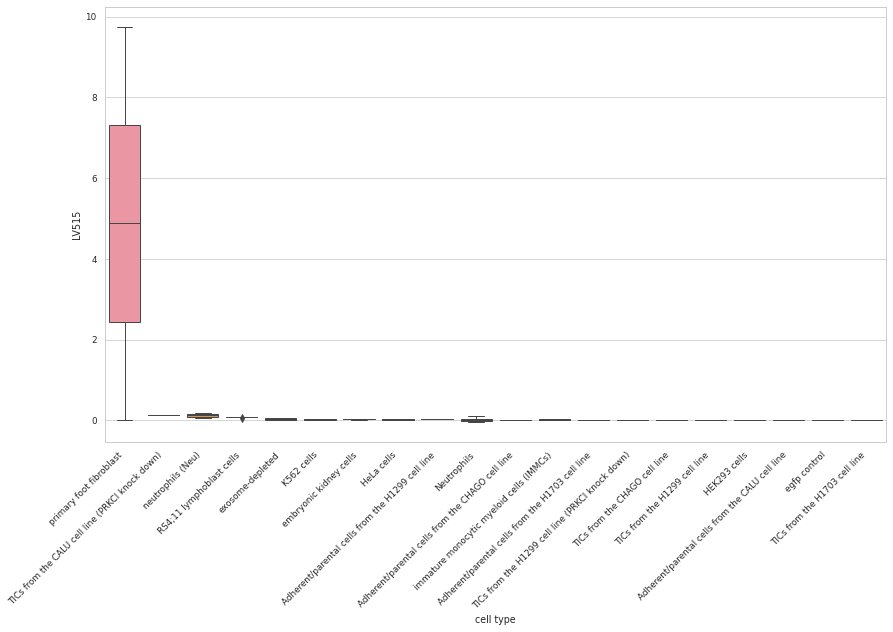

array(['SRP024268', 'SRP065219', 'SRP066834', 'SRP058237', 'SRP048759',
       'SRP066729', 'SRP057196', 'SRP007359', 'SRP056295', 'SRP055513',
       'SRP028594', 'SRP056197'], dtype=object)

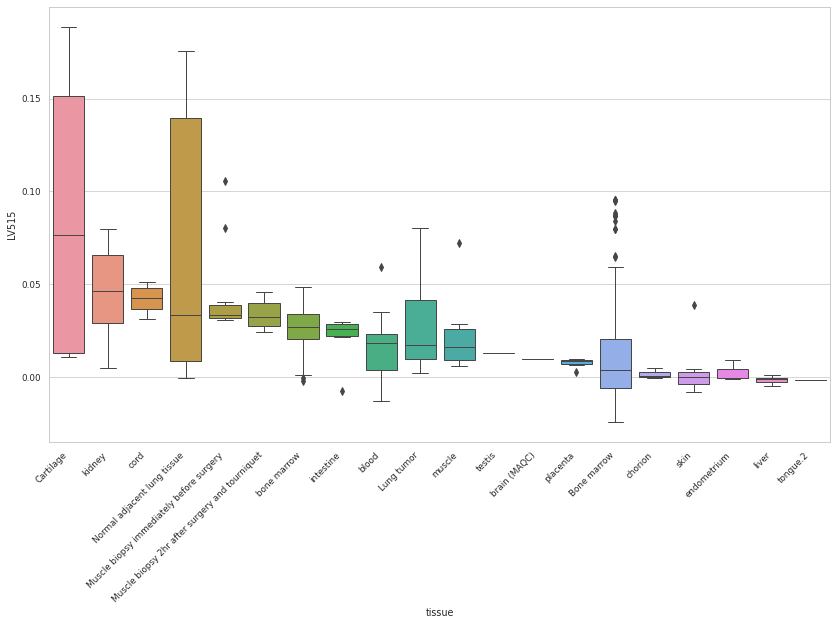

array(['SRP058667'], dtype=object)

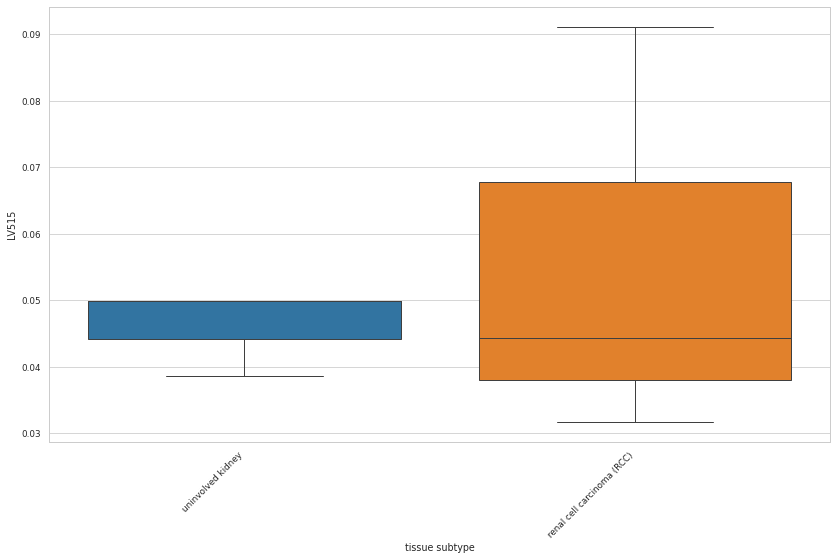

array(['SRP058667'], dtype=object)

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:430: UserWarning: Single value for tissue type: 0.04709790434632514
  warnings.warn(f"Single value for {imp_f}: {cat_order}")


Empty DataFrame
Columns: [pathway, LV index, AUC, p-value, FDR]
Index: []

SRP055569, SRP066834, SRP060416, SRP057196, SRP058773, SRP066729, SRP042161, SRP007947, SRP042218, SRP011185, SRP063840, SRP064464, SRP025982, SRP012056, SRP050892, SRP021509, SRP033135, SRP015449, SRP012461, SRP055512, SRP007338, SRP050499, SRP055153, SRP009266, SRP017777, SRP058667, SRP048820, SRP062177, SRP014739, SRP019222, SRP015013, SRP014428, SRP024268, SRP050992, SRP012099, SRP029334, SRP055810, SRP017575, SRP002306, SRP019817, SRP032789, SRP059775, SRP010166, SRP029739, SRP019936, SRP061243, SRP064259, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (45 != 47)
  warnings.warn(


''

celiac disease                                                                                  10.157057
malabsorption syndrome                                                                           7.400119
K11_COELIAC-Coeliac_disease                                                                      7.260687
6144_3-Never_eat_eggs_dairy_wheat_sugar_Wheat_products                                           5.728349
30020_raw-Haemoglobin_concentration                                                              3.888992
20154_raw-Forced_expiratory_volume_in_1second_FEV1_predicted_percentage                          3.751472
hyperthyroidism AND thyrotoxicosis                                                               3.748714
3148_raw-Heel_bone_mineral_density_BMD                                                           3.739927
78_raw-Heel_bone_mineral_density_BMD_Tscore_automated                                            3.705953
3147_raw-Heel_quantitative_ultrasound_index_QU

''

gene_name     LV343 gene_band
0   ZKSCAN3  8.132252    6p22.1
1     ASB13  6.521010   10p15.1
2     SPDYA  6.097037    2p23.2
3   ALDH7A1  3.114189    5q23.2
4      UBL5  2.420909   19p13.2
5     NAA38  2.055732   17p13.1
6      RAD1  1.964145    5p13.2
7     BACE2  1.833528   21q22.2
8    MRPS24  1.831710      7p13
9     PSMB1  1.830938      6q27

cell type         0.024043
tissue            0.002435
tissue type       0.000523
tissue subtype    0.000416
dtype: float64

array(['SRP055569', 'SRP060416', 'SRP057196', 'SRP042161', 'SRP007947',
       'SRP042218', 'SRP063840', 'SRP021509', 'SRP033135', 'SRP012461',
       'SRP055512', 'SRP055153', 'SRP048820', 'SRP062177', 'SRP014428',
       'SRP050992', 'SRP002306', 'SRP019817', 'SRP010166', 'SRP064259'],
      dtype=object)

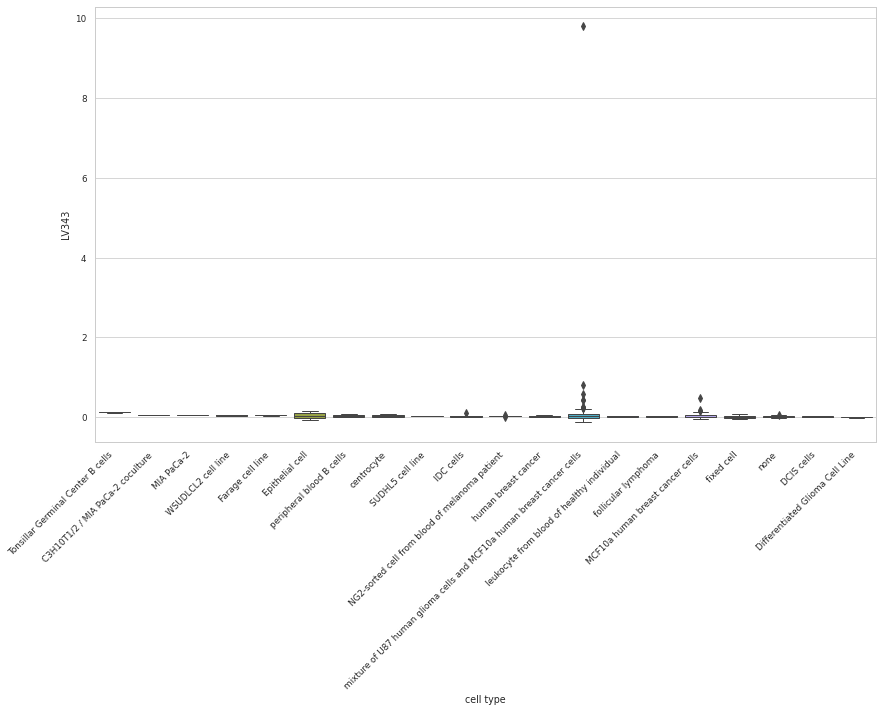

array(['SRP066834', 'SRP057196', 'SRP066729', 'SRP042218', 'SRP017777',
       'SRP048820', 'SRP014739', 'SRP014428', 'SRP024268', 'SRP017575',
       'SRP061243'], dtype=object)

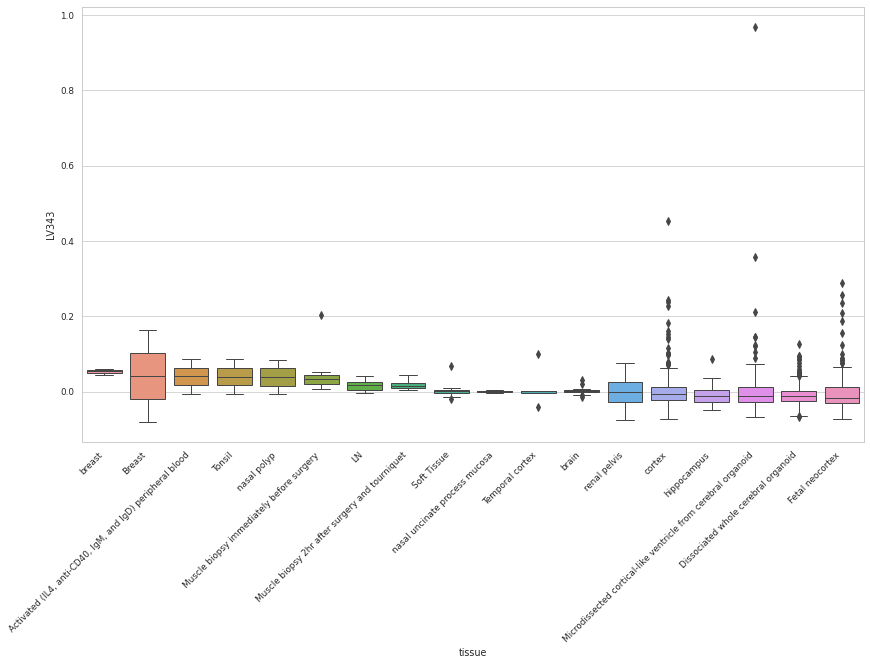

array(['SRP058667', 'SRP019936'], dtype=object)

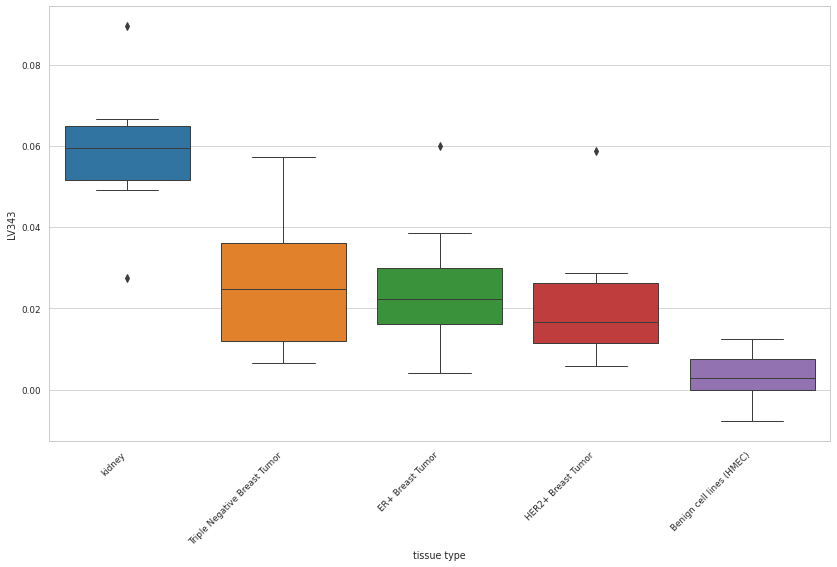

array(['SRP058667'], dtype=object)

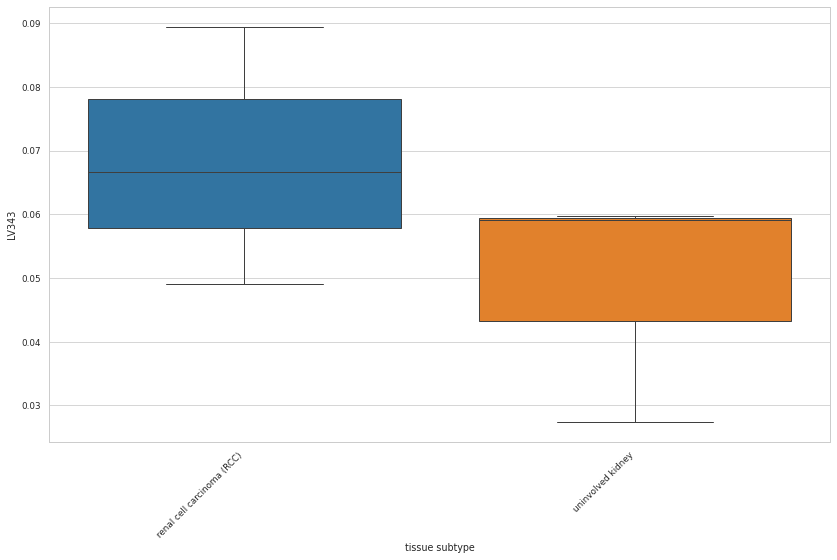

In [28]:
for lv_name in selected_lvs:
    display(HTML(f"<h2>{lv_name}</h2>"))

    #     lv_name = lv_info["name"]
    lv_obj = lv_exp = LVAnalysis(lv_name, data)

    # show lv prior knowledge match (pathways)
    lv_pathways = multiplier_model_summary[
        multiplier_model_summary["LV index"].isin((lv_name[2:],))
        & (
            (multiplier_model_summary["FDR"] < 0.05)
            | (multiplier_model_summary["AUC"] >= 0.75)
        )
    ]
    display(lv_pathways)

    lv_data = lv_obj.get_experiments_data()

    display("")
    display(lv_obj.lv_traits.head(20))
    display("")
    display(lv_obj.lv_genes.head(10))

    lv_attrs = lv_obj.get_attributes_variation_score()
    _tmp = pd.Series(lv_attrs.index)
    lv_attrs = lv_attrs[
        _tmp.str.match(
            "(?:cell.+type$)|(?:tissue$)|(?:tissue.+type$)",
            case=False,
            flags=re.IGNORECASE,
        ).values
    ].sort_values(ascending=False)
    display(lv_attrs)

    for _lva in lv_attrs.index:
        display(HTML(f"<h3>{_lva}</h3>"))
        display(lv_data[_lva].dropna().reset_index()["project"].unique())

        with sns.plotting_context("paper", font_scale=1.0), sns.axes_style("whitegrid"):
            fig, ax = plt.subplots(figsize=(14, 8))
            ax = lv_obj.plot_attribute(_lva, top_x_values=20)
            if ax is None:
                plt.close(fig)
                continue
            display(fig)
            plt.close(fig)

    LV_OBJS[lv_name] = lv_obj